In [348]:

import csv
import pandas as pd
import tensorflow as tf
from os import path, getcwd, chdir
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 
import random
import scipy
from sklearn import preprocessing
import shap
import sklearn
import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [2]:
data=pd.read_csv(r'C:\Users\mao28\Desktop\fall2020BU\casecomp\2020_Competition_Training (1).csv',header=0,low_memory=False)
data=data.replace('F', 1).replace('M',2).replace('EM',1).replace('LV',2).replace('ENG',1)\
.replace('E',2).replace('SPA',3).replace('H1',1).replace('H2',2).replace('H3',2)\
.replace('H4',4).replace('H5',5).replace('H6',6).replace('H7',7).replace('H8',8)\
.replace('C1',9).replace('C2',10).replace('C3',11).replace('C4',12).replace('C5',13)\
.replace('C6',14).replace('C7',15).replace('UNK',0).replace('nan',None).replace('A',1)\
.replace('B',2).replace('L',3).replace('J',4).replace('U',5).replace('D',6)\
.replace('K',7).replace('G',8).replace('C',9).replace('H',10).replace('F',11)\
.replace('I',12).replace('E',13).replace('Y',1).replace('P',15).replace('R',16)\
.replace('T',17).replace('N',0).replace('NA',None).replace('1-Metro',20).replace('2-Metro',21)\
.replace('6-Nonmetro',22).replace('3-Metro',23).replace('4-Nonmetro',24).replace('7-Nonmetro',25).replace('8-Nonmetro',26)\
.replace('5-Nonmetro',27).replace('9-Nonmetro',28).replace('other',29).replace('FL',30).replace('TN',31)\
.replace('LA',33).replace('NV',34).replace('IL',35).replace('NC',36).replace('VA',37)\
.replace('KY',38).replace('AZ',39).replace('IN',40).replace('GA',41).replace('SC',42)\
.replace('CO',43).replace('TX',44).replace('MT',45).replace('MS',46).replace('OH',47)\
.replace('AL',48).replace('MO',49).replace('CA',50).replace('MN',51).replace('WA',52)\
.replace('IA',53).replace('WV',54).replace('PR',55).replace('WI',56).replace('AR',57).replace('NM',58).replace('CN',59).replace('CF',60)\
.replace('CP',61).replace('SE',62).replace('*',None).drop('hedis_ami',axis=1)



In [269]:
data=data.interpolate(method='pchip').replace('OK',1).replace('SD',58)
print('done')   

done


In [270]:
#base line model
data00=data.fillna(0)

In [271]:
type(data00)

pandas.core.frame.DataFrame

In [272]:
parameter = []
trans_chan = []
full_list00=[]
#append value to each list
for i in range(len(data00['transportation_issues'])):
    #fetch eachrow
    idindex=data00['person_id_syn'][i]
    subset=data00.loc[data00['person_id_syn']==idindex]
    full_list00.append(((subset.values.tolist())[0][1:55]))#55 is current best
    
print('done')    

done


In [273]:
test_portion=0.1
random.shuffle(full_list00)
parameter = []
trans_chan = []
for x in range(len(full_list00)):
    parameter.append(full_list00[x][1:])
    trans_chan.append(full_list00[x][0])
split=int(test_portion * len(full_list00))
parameter=np.asarray(parameter)
trans_chan=np.asarray(trans_chan)
test_sequences = parameter[0:split]
training_sequences = parameter[split:len(full_list00)]
test_labels = trans_chan[0:split]
training_labels = trans_chan[split:len(full_list00)]
print(len(training_sequences),len(test_sequences))
print('done') 

62615 6957
done


In [274]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(training_sequences)
x_test = min_max_scaler.fit_transform(test_sequences)
#training_padded = np.array(training_sequences)
y_train = np.array(training_labels)
#testing_padded = np.array(test_sequences)
y_test = np.array(test_labels)

In [275]:
input_dim=len(test_sequences[1])
batch_size=len(training_sequences)/1000
print(batch_size)
model00 = tf.keras.Sequential([
    Dense(471, kernel_initializer = 'uniform',activation='relu',input_dim=input_dim),
    Dropout(0.3),
    Dense(200, activation='relu'),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dropout(0.3),
    #Dense(25, activation='relu'),
   # Dropout(0.2),
    #Dense(5, activation='relu'),
    #Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model00.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model00.summary()
num_epochs = 50
#print(training_sequences[2])
#print(training_padded[2])
history00 = model00.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test),batch_size=int(batch_size))

print("Training Complete")

62.615
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 471)               25434     
_________________________________________________________________
dropout_60 (Dropout)         (None, 471)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 200)               94400     
_________________________________________________________________
dropout_61 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_62 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 101       
Tot

62615/62615 [==============================] - ETA: 8s - loss: 0.3364 - acc: 0.887 - ETA: 4s - loss: 0.3522 - acc: 0.864 - ETA: 4s - loss: 0.3565 - acc: 0.863 - ETA: 4s - loss: 0.3583 - acc: 0.864 - ETA: 4s - loss: 0.3599 - acc: 0.863 - ETA: 4s - loss: 0.3662 - acc: 0.860 - ETA: 4s - loss: 0.3703 - acc: 0.861 - ETA: 4s - loss: 0.3740 - acc: 0.858 - ETA: 4s - loss: 0.3751 - acc: 0.858 - ETA: 4s - loss: 0.3744 - acc: 0.858 - ETA: 4s - loss: 0.3762 - acc: 0.857 - ETA: 3s - loss: 0.3790 - acc: 0.855 - ETA: 3s - loss: 0.3819 - acc: 0.853 - ETA: 3s - loss: 0.3822 - acc: 0.854 - ETA: 3s - loss: 0.3816 - acc: 0.854 - ETA: 3s - loss: 0.3830 - acc: 0.853 - ETA: 3s - loss: 0.3839 - acc: 0.853 - ETA: 3s - loss: 0.3821 - acc: 0.854 - ETA: 3s - loss: 0.3825 - acc: 0.854 - ETA: 3s - loss: 0.3823 - acc: 0.854 - ETA: 3s - loss: 0.3811 - acc: 0.855 - ETA: 3s - loss: 0.3820 - acc: 0.854 - ETA: 3s - loss: 0.3819 - acc: 0.855 - ETA: 3s - loss: 0.3827 - acc: 0.855 - ETA: 3s - loss: 0.3816 - acc: 0.855 - ETA

62615/62615 [==============================] - ETA: 7s - loss: 0.3331 - acc: 0.871 - ETA: 4s - loss: 0.3758 - acc: 0.862 - ETA: 4s - loss: 0.3834 - acc: 0.859 - ETA: 4s - loss: 0.3822 - acc: 0.860 - ETA: 4s - loss: 0.3805 - acc: 0.859 - ETA: 4s - loss: 0.3850 - acc: 0.855 - ETA: 4s - loss: 0.3929 - acc: 0.850 - ETA: 4s - loss: 0.3940 - acc: 0.850 - ETA: 4s - loss: 0.3881 - acc: 0.852 - ETA: 4s - loss: 0.3832 - acc: 0.856 - ETA: 4s - loss: 0.3848 - acc: 0.855 - ETA: 4s - loss: 0.3838 - acc: 0.855 - ETA: 3s - loss: 0.3825 - acc: 0.855 - ETA: 3s - loss: 0.3842 - acc: 0.854 - ETA: 3s - loss: 0.3853 - acc: 0.854 - ETA: 3s - loss: 0.3871 - acc: 0.853 - ETA: 3s - loss: 0.3855 - acc: 0.854 - ETA: 3s - loss: 0.3846 - acc: 0.854 - ETA: 3s - loss: 0.3867 - acc: 0.853 - ETA: 3s - loss: 0.3848 - acc: 0.854 - ETA: 3s - loss: 0.3827 - acc: 0.855 - ETA: 3s - loss: 0.3832 - acc: 0.855 - ETA: 3s - loss: 0.3817 - acc: 0.856 - ETA: 3s - loss: 0.3801 - acc: 0.857 - ETA: 3s - loss: 0.3807 - acc: 0.856 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.4984 - acc: 0.822 - ETA: 4s - loss: 0.3694 - acc: 0.858 - ETA: 4s - loss: 0.3618 - acc: 0.860 - ETA: 4s - loss: 0.3517 - acc: 0.868 - ETA: 4s - loss: 0.3529 - acc: 0.866 - ETA: 4s - loss: 0.3572 - acc: 0.865 - ETA: 4s - loss: 0.3561 - acc: 0.865 - ETA: 4s - loss: 0.3583 - acc: 0.864 - ETA: 4s - loss: 0.3583 - acc: 0.864 - ETA: 4s - loss: 0.3609 - acc: 0.863 - ETA: 4s - loss: 0.3600 - acc: 0.864 - ETA: 3s - loss: 0.3634 - acc: 0.863 - ETA: 3s - loss: 0.3630 - acc: 0.863 - ETA: 3s - loss: 0.3639 - acc: 0.862 - ETA: 3s - loss: 0.3644 - acc: 0.861 - ETA: 3s - loss: 0.3667 - acc: 0.860 - ETA: 3s - loss: 0.3656 - acc: 0.861 - ETA: 3s - loss: 0.3651 - acc: 0.861 - ETA: 3s - loss: 0.3652 - acc: 0.861 - ETA: 3s - loss: 0.3660 - acc: 0.861 - ETA: 3s - loss: 0.3671 - acc: 0.861 - ETA: 3s - loss: 0.3680 - acc: 0.861 - ETA: 3s - loss: 0.3694 - acc: 0.860 - ETA: 3s - loss: 0.3682 - acc: 0.861 - ETA: 3s - loss: 0.3694 - acc: 0.860 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.3184 - acc: 0.903 - ETA: 4s - loss: 0.4073 - acc: 0.830 - ETA: 4s - loss: 0.4031 - acc: 0.839 - ETA: 4s - loss: 0.3811 - acc: 0.848 - ETA: 4s - loss: 0.3872 - acc: 0.847 - ETA: 4s - loss: 0.3871 - acc: 0.848 - ETA: 4s - loss: 0.3795 - acc: 0.851 - ETA: 4s - loss: 0.3810 - acc: 0.851 - ETA: 4s - loss: 0.3820 - acc: 0.851 - ETA: 4s - loss: 0.3771 - acc: 0.854 - ETA: 4s - loss: 0.3758 - acc: 0.855 - ETA: 4s - loss: 0.3780 - acc: 0.853 - ETA: 3s - loss: 0.3794 - acc: 0.852 - ETA: 3s - loss: 0.3780 - acc: 0.853 - ETA: 3s - loss: 0.3769 - acc: 0.853 - ETA: 3s - loss: 0.3761 - acc: 0.854 - ETA: 3s - loss: 0.3776 - acc: 0.853 - ETA: 3s - loss: 0.3779 - acc: 0.853 - ETA: 3s - loss: 0.3776 - acc: 0.854 - ETA: 3s - loss: 0.3767 - acc: 0.854 - ETA: 3s - loss: 0.3764 - acc: 0.855 - ETA: 3s - loss: 0.3749 - acc: 0.855 - ETA: 3s - loss: 0.3750 - acc: 0.855 - ETA: 3s - loss: 0.3752 - acc: 0.855 - ETA: 3s - loss: 0.3756 - acc: 0.855 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.4589 - acc: 0.790 - ETA: 4s - loss: 0.3489 - acc: 0.872 - ETA: 4s - loss: 0.3470 - acc: 0.871 - ETA: 4s - loss: 0.3478 - acc: 0.871 - ETA: 4s - loss: 0.3502 - acc: 0.870 - ETA: 4s - loss: 0.3541 - acc: 0.867 - ETA: 4s - loss: 0.3591 - acc: 0.864 - ETA: 4s - loss: 0.3584 - acc: 0.864 - ETA: 4s - loss: 0.3586 - acc: 0.864 - ETA: 4s - loss: 0.3557 - acc: 0.865 - ETA: 3s - loss: 0.3553 - acc: 0.866 - ETA: 3s - loss: 0.3610 - acc: 0.863 - ETA: 3s - loss: 0.3648 - acc: 0.861 - ETA: 3s - loss: 0.3650 - acc: 0.861 - ETA: 3s - loss: 0.3663 - acc: 0.861 - ETA: 3s - loss: 0.3669 - acc: 0.861 - ETA: 3s - loss: 0.3670 - acc: 0.861 - ETA: 3s - loss: 0.3662 - acc: 0.861 - ETA: 3s - loss: 0.3671 - acc: 0.861 - ETA: 3s - loss: 0.3674 - acc: 0.861 - ETA: 3s - loss: 0.3668 - acc: 0.861 - ETA: 3s - loss: 0.3668 - acc: 0.861 - ETA: 3s - loss: 0.3671 - acc: 0.861 - ETA: 3s - loss: 0.3658 - acc: 0.862 - ETA: 3s - loss: 0.3658 - acc: 0.862 - ETA

62615/62615 [==============================] - ETA: 9s - loss: 0.3767 - acc: 0.854 - ETA: 4s - loss: 0.3290 - acc: 0.881 - ETA: 4s - loss: 0.3316 - acc: 0.882 - ETA: 4s - loss: 0.3525 - acc: 0.868 - ETA: 4s - loss: 0.3524 - acc: 0.869 - ETA: 4s - loss: 0.3540 - acc: 0.869 - ETA: 4s - loss: 0.3492 - acc: 0.871 - ETA: 4s - loss: 0.3576 - acc: 0.868 - ETA: 4s - loss: 0.3593 - acc: 0.867 - ETA: 4s - loss: 0.3595 - acc: 0.867 - ETA: 4s - loss: 0.3613 - acc: 0.865 - ETA: 4s - loss: 0.3579 - acc: 0.866 - ETA: 3s - loss: 0.3607 - acc: 0.865 - ETA: 3s - loss: 0.3631 - acc: 0.864 - ETA: 3s - loss: 0.3623 - acc: 0.864 - ETA: 3s - loss: 0.3645 - acc: 0.863 - ETA: 3s - loss: 0.3657 - acc: 0.862 - ETA: 3s - loss: 0.3669 - acc: 0.861 - ETA: 3s - loss: 0.3660 - acc: 0.861 - ETA: 3s - loss: 0.3667 - acc: 0.861 - ETA: 3s - loss: 0.3665 - acc: 0.861 - ETA: 3s - loss: 0.3656 - acc: 0.862 - ETA: 3s - loss: 0.3663 - acc: 0.862 - ETA: 3s - loss: 0.3636 - acc: 0.863 - ETA: 3s - loss: 0.3643 - acc: 0.863 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.3143 - acc: 0.903 - ETA: 4s - loss: 0.4059 - acc: 0.837 - ETA: 4s - loss: 0.3894 - acc: 0.851 - ETA: 4s - loss: 0.3769 - acc: 0.859 - ETA: 4s - loss: 0.3715 - acc: 0.862 - ETA: 4s - loss: 0.3626 - acc: 0.866 - ETA: 4s - loss: 0.3644 - acc: 0.867 - ETA: 4s - loss: 0.3598 - acc: 0.869 - ETA: 4s - loss: 0.3623 - acc: 0.868 - ETA: 4s - loss: 0.3581 - acc: 0.868 - ETA: 4s - loss: 0.3545 - acc: 0.869 - ETA: 4s - loss: 0.3558 - acc: 0.869 - ETA: 3s - loss: 0.3537 - acc: 0.869 - ETA: 3s - loss: 0.3551 - acc: 0.868 - ETA: 3s - loss: 0.3578 - acc: 0.867 - ETA: 3s - loss: 0.3585 - acc: 0.866 - ETA: 3s - loss: 0.3583 - acc: 0.866 - ETA: 3s - loss: 0.3585 - acc: 0.865 - ETA: 3s - loss: 0.3597 - acc: 0.864 - ETA: 3s - loss: 0.3585 - acc: 0.865 - ETA: 3s - loss: 0.3586 - acc: 0.865 - ETA: 3s - loss: 0.3598 - acc: 0.864 - ETA: 3s - loss: 0.3617 - acc: 0.863 - ETA: 3s - loss: 0.3631 - acc: 0.862 - ETA: 3s - loss: 0.3637 - acc: 0.862 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.2864 - acc: 0.887 - ETA: 4s - loss: 0.3547 - acc: 0.861 - ETA: 4s - loss: 0.3637 - acc: 0.858 - ETA: 4s - loss: 0.3472 - acc: 0.864 - ETA: 4s - loss: 0.3387 - acc: 0.868 - ETA: 4s - loss: 0.3383 - acc: 0.869 - ETA: 4s - loss: 0.3424 - acc: 0.867 - ETA: 4s - loss: 0.3452 - acc: 0.866 - ETA: 4s - loss: 0.3432 - acc: 0.868 - ETA: 4s - loss: 0.3455 - acc: 0.867 - ETA: 4s - loss: 0.3471 - acc: 0.866 - ETA: 3s - loss: 0.3466 - acc: 0.867 - ETA: 3s - loss: 0.3487 - acc: 0.866 - ETA: 3s - loss: 0.3491 - acc: 0.865 - ETA: 3s - loss: 0.3483 - acc: 0.865 - ETA: 3s - loss: 0.3485 - acc: 0.866 - ETA: 3s - loss: 0.3483 - acc: 0.866 - ETA: 3s - loss: 0.3490 - acc: 0.866 - ETA: 3s - loss: 0.3492 - acc: 0.866 - ETA: 3s - loss: 0.3507 - acc: 0.865 - ETA: 3s - loss: 0.3532 - acc: 0.864 - ETA: 3s - loss: 0.3546 - acc: 0.863 - ETA: 3s - loss: 0.3536 - acc: 0.864 - ETA: 3s - loss: 0.3540 - acc: 0.864 - ETA: 3s - loss: 0.3540 - acc: 0.864 - ETA

62615/62615 [==============================] - ETA: 9s - loss: 0.4080 - acc: 0.838 - ETA: 4s - loss: 0.3350 - acc: 0.882 - ETA: 4s - loss: 0.3409 - acc: 0.872 - ETA: 4s - loss: 0.3406 - acc: 0.871 - ETA: 4s - loss: 0.3416 - acc: 0.868 - ETA: 4s - loss: 0.3408 - acc: 0.870 - ETA: 4s - loss: 0.3419 - acc: 0.870 - ETA: 4s - loss: 0.3423 - acc: 0.870 - ETA: 4s - loss: 0.3422 - acc: 0.870 - ETA: 4s - loss: 0.3428 - acc: 0.871 - ETA: 4s - loss: 0.3454 - acc: 0.870 - ETA: 4s - loss: 0.3466 - acc: 0.869 - ETA: 3s - loss: 0.3475 - acc: 0.868 - ETA: 3s - loss: 0.3444 - acc: 0.870 - ETA: 3s - loss: 0.3422 - acc: 0.871 - ETA: 3s - loss: 0.3453 - acc: 0.869 - ETA: 3s - loss: 0.3478 - acc: 0.868 - ETA: 3s - loss: 0.3484 - acc: 0.868 - ETA: 3s - loss: 0.3483 - acc: 0.868 - ETA: 3s - loss: 0.3505 - acc: 0.867 - ETA: 3s - loss: 0.3494 - acc: 0.868 - ETA: 3s - loss: 0.3486 - acc: 0.868 - ETA: 3s - loss: 0.3476 - acc: 0.869 - ETA: 3s - loss: 0.3483 - acc: 0.869 - ETA: 3s - loss: 0.3485 - acc: 0.869 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.2348 - acc: 0.935 - ETA: 4s - loss: 0.3400 - acc: 0.871 - ETA: 4s - loss: 0.3423 - acc: 0.866 - ETA: 4s - loss: 0.3541 - acc: 0.865 - ETA: 4s - loss: 0.3561 - acc: 0.865 - ETA: 4s - loss: 0.3445 - acc: 0.871 - ETA: 4s - loss: 0.3472 - acc: 0.870 - ETA: 4s - loss: 0.3536 - acc: 0.867 - ETA: 4s - loss: 0.3516 - acc: 0.868 - ETA: 4s - loss: 0.3556 - acc: 0.866 - ETA: 4s - loss: 0.3558 - acc: 0.866 - ETA: 4s - loss: 0.3505 - acc: 0.868 - ETA: 3s - loss: 0.3485 - acc: 0.870 - ETA: 3s - loss: 0.3504 - acc: 0.869 - ETA: 3s - loss: 0.3512 - acc: 0.869 - ETA: 3s - loss: 0.3516 - acc: 0.869 - ETA: 3s - loss: 0.3516 - acc: 0.868 - ETA: 3s - loss: 0.3504 - acc: 0.869 - ETA: 3s - loss: 0.3494 - acc: 0.870 - ETA: 3s - loss: 0.3477 - acc: 0.871 - ETA: 3s - loss: 0.3483 - acc: 0.871 - ETA: 3s - loss: 0.3502 - acc: 0.870 - ETA: 3s - loss: 0.3498 - acc: 0.870 - ETA: 3s - loss: 0.3489 - acc: 0.870 - ETA: 3s - loss: 0.3481 - acc: 0.870 - ETA

62615/62615 [==============================] - ETA: 9s - loss: 0.2054 - acc: 0.935 - ETA: 4s - loss: 0.3141 - acc: 0.887 - ETA: 4s - loss: 0.3492 - acc: 0.861 - ETA: 4s - loss: 0.3574 - acc: 0.858 - ETA: 4s - loss: 0.3549 - acc: 0.860 - ETA: 4s - loss: 0.3590 - acc: 0.861 - ETA: 4s - loss: 0.3585 - acc: 0.862 - ETA: 4s - loss: 0.3622 - acc: 0.860 - ETA: 4s - loss: 0.3587 - acc: 0.862 - ETA: 4s - loss: 0.3524 - acc: 0.864 - ETA: 4s - loss: 0.3505 - acc: 0.866 - ETA: 4s - loss: 0.3515 - acc: 0.866 - ETA: 3s - loss: 0.3524 - acc: 0.866 - ETA: 3s - loss: 0.3514 - acc: 0.866 - ETA: 3s - loss: 0.3499 - acc: 0.867 - ETA: 3s - loss: 0.3496 - acc: 0.868 - ETA: 3s - loss: 0.3512 - acc: 0.866 - ETA: 3s - loss: 0.3495 - acc: 0.867 - ETA: 3s - loss: 0.3491 - acc: 0.868 - ETA: 3s - loss: 0.3507 - acc: 0.867 - ETA: 3s - loss: 0.3496 - acc: 0.867 - ETA: 3s - loss: 0.3488 - acc: 0.868 - ETA: 3s - loss: 0.3500 - acc: 0.867 - ETA: 3s - loss: 0.3481 - acc: 0.868 - ETA: 3s - loss: 0.3455 - acc: 0.869 - ETA

62615/62615 [==============================] - ETA: 8s - loss: 0.4512 - acc: 0.838 - ETA: 4s - loss: 0.3059 - acc: 0.889 - ETA: 4s - loss: 0.3272 - acc: 0.876 - ETA: 4s - loss: 0.3450 - acc: 0.868 - ETA: 4s - loss: 0.3481 - acc: 0.868 - ETA: 4s - loss: 0.3466 - acc: 0.869 - ETA: 4s - loss: 0.3382 - acc: 0.874 - ETA: 4s - loss: 0.3410 - acc: 0.872 - ETA: 4s - loss: 0.3392 - acc: 0.873 - ETA: 4s - loss: 0.3330 - acc: 0.876 - ETA: 4s - loss: 0.3359 - acc: 0.875 - ETA: 4s - loss: 0.3329 - acc: 0.876 - ETA: 3s - loss: 0.3323 - acc: 0.877 - ETA: 3s - loss: 0.3326 - acc: 0.877 - ETA: 3s - loss: 0.3320 - acc: 0.877 - ETA: 3s - loss: 0.3312 - acc: 0.878 - ETA: 3s - loss: 0.3332 - acc: 0.877 - ETA: 3s - loss: 0.3350 - acc: 0.876 - ETA: 3s - loss: 0.3371 - acc: 0.875 - ETA: 3s - loss: 0.3368 - acc: 0.875 - ETA: 3s - loss: 0.3387 - acc: 0.874 - ETA: 3s - loss: 0.3382 - acc: 0.875 - ETA: 3s - loss: 0.3373 - acc: 0.875 - ETA: 3s - loss: 0.3376 - acc: 0.875 - ETA: 3s - loss: 0.3364 - acc: 0.875 - ETA

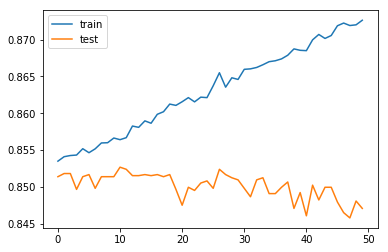

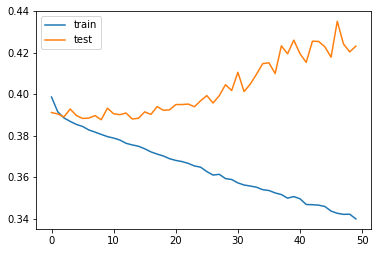

In [276]:
from matplotlib import pyplot

pyplot.plot(history00.history['acc'], label='train')
pyplot.plot(history00.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history00.history['loss'], label='train')
pyplot.plot(history00.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [277]:
#QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ

In [278]:
BHI=['bh_adtp_ind','bh_aoth_ind','bh_bipr_ind','bh_cdal_ind','bh_cdsb_ind','bh_cdto_ind','bh_dema_ind']
Disease=['ccsp_014_ind','ccsp_020_ind','ccsp_021_ind','ccsp_034_ind','ccsp_060_ind','ccsp_062_ind','ccsp_080_ind'\
 ,'ccsp_107_ind','ccsp_120_ind','ccsp_125_ind','ccsp_130_ind','ccsp_163_ind','ccsp_169_ind','ccsp_204_ind'\
 ,'ccsp_205_ind','ccsp_212_ind','ccsp_220_ind','ccsp_228_ind','ccsp_236_ind','ccsp_239_ind','ccsp_242_ind']
M_S=['cms_disabled_ind','cms_dual_eligible_ind','cms_hospice_ind','cms_low_income_ind','cms_ma_risk_score_nbr']
CMS=['cmsd2_can_unc_neo/plycyth/myelo_ind','cmsd2_eye_blindness_ind',\
 'cmsd2_gus_m_genital_ind','cmsd2_men_mad_ind','cmsd2_men_men_substance_ind','cmsd2_mus_polyarthropath_ind'\
 ,'cmsd2_mus_spondylopath_ind','cmsd2_skn_radiation_ind','cmsd2_sns_general_ind']
KBM=['cons_hcaccprf_h','cons_hcaccprf_p','cons_n65p_y','cons_online_buyer','cons_n2029_y','cons_n2mob',\
 'cons_n2pbl','cons_ret_y','cons_retail_buyer','cons_veteran_y']
HEDIS=['hedis_cmc_ldc_c_screen','hedis_cmc_ldc_c_control','hedis_dia_eye','hedis_dia_hba1c_ge9','hedis_dia_hba1c_test',\
 'hedis_dia_ldc_c_control','hedis_dia_ldc_c_screen','hedis_dia_ma_nephr']
HP=['hlth_pgm_slvrsnkr_par_status','hlth_pgm_slvrsnkr_pct_par','hlth_pgm_slvrsnkr_refer_status']
Abnormal_Lab=['lab_abn_result_ind','lab_bnp_abn_result_ind','lab_bun_abn_result_ind','lab_cholesterol_abn_result_ind',\
   'lab_creatinine_abn_result_ind','lab_egfr_abn_result_ind','lab_hba1_c_abn_result_ind','lab_hemoglobin_abn_result_ind']
Bi_select_group_cat=['prov_spec_addiction_all_ind','prov_spec_ambulance_ind','prov_spec_bh_psychiatric_ind','prov_spec_chiropractic_ind',\
   'prov_spec_home_health_ind','prov_spec_med_supply_ind','prov_spec_nurse_phy_assist_ind','prov_spec_pain_mgmt_ind','prov_spec_phy_general_ind','prov_spec_phy_geriatric_ind']
Revenue_code_center=['rev_cms_ambul_ind','rev_cms_clinic_ind','rev_cms_er_ind','rev_cms_icu_ind','rev_cms_lab_ind','rev_cms_nicu_ind','rev_cms_phar_ind']
major_cl_cat=['submcc_mus_back_ind','submcc_cad_ang_ind','submcc_gus_othr_ind','submcc_trm_spfx_ind','submcc_bld_othr_ind','submcc_hdz_it_is_ind','submcc_ano_cns_ind'\
,'submcc_trm_spnj_ind','submcc_pre_del_ind','submcc_can_gu_ind','submcc_inf_sep_ind','submcc_can_ner_ind','submcc_res_copd_ind'\
,'submcc_ner_migr_ind','submcc_dig_othr_ind','submcc_can_sec_ind','submcc_vco_end_ind','submcc_rar_drm_ind','submcc_dia_eye_ind','submcc_hdz_othr_ind'\
,'submcc_brn_othr_ind','submcc_cir_art_ind','submcc_trm_brn_ind','submcc_hiv_othr_ind','submcc_ben_ner_ind','submcc_ben_lymp_ind','submcc_ben_unk_ind'\
,'submcc_cir_anur_ind','submcc_pre_othr_ind','submcc_ano_hrt_ind' ,'submcc_cer_tia_ind' ,'submcc_hdz_arrh_ind' ,'submcc_rar_ms_ind'\
,'submcc_dig_ugi_ind','submcc_mus_soft_ind','submcc_res_othr_ind','submcc_ano_mus_ind','submcc_ner_deg_ind','submcc_dia_pvd_ind'\
,'submcc_cir_othr_ind','submcc_can_leuk_ind','submcc_rar_othr_ind','submcc_ner_infl_ind','submcc_can_end_ind','submcc_inj_comp_ind','submcc_dig_lgi_ind'\
,'submcc_mus_jnt_ind','submcc_men_alco_ind','submcc_trm_hip_ind','submcc_dia_nep_ind','submcc_sns_dth_ind','submcc_cer_occ_ind'\
,'submcc_mus_form_ind','submcc_hdz_surg_ind','submcc_ano_othr_ind','submcc_cad_fh/ho_ind','submcc_end_gld_ind','submcc_inj_othr_ind'\
,'submcc_sns_cons_ind','submcc_men_othr_ind','submcc_can_res_ind','submcc_cer_seq_ind','submcc_rar_cid_ind','submcc_men_abus_ind','submcc_dia_neu_ind'\
,'submcc_ner_epil_ind','submcc_can_skn_ind','submcc_neo_fh/ho_ind','submcc_cad_ashd_ind','submcc_inf_cand_ind','submcc_trm_fxul_ind','submcc_sns_abd_ind','submcc_sor_ear_ind'\
,'submcc_res_asth_ind','submcc_end_thy_ind','submcc_mus_oste_ind','submcc_cad_isch_ind','submcc_sns_coma_ind','submcc_can_othr_ind','submcc_trm_prly_ind','submcc_cad_cabg_ind'\
,'submcc_gus_brst_ind','submcc_rar_als_ind','submcc_rar_cf_ind','submcc_rsk_smok_ind','submcc_rar_sca_ind','submcc_can_h/n_ind','submcc_inf_men_ind'\
,'submcc_hdz_it_i_ind','submcc_rar_lup_ind','submcc_trm_fxu_ind','submcc_end_meta_ind','submcc_pre_com_ind','submcc_hiv_pcp_ind','submcc_end_nutr_ind'\
,'submcc_res_inf_ind','submcc_end_othr_ind','submcc_ano_gu_ind','submcc_rar_pol_ind','submcc_can_dig_ind','submcc_trm_skul_ind','submcc_gus_male_ind','submcc_res_fail_ind'\
,'submcc_vco_care_ind','submcc_gus_fem_ind','submcc_rsk_fh/h_ind','submcc_inj_org_ind','submcc_mus_othr_ind','submcc_rsk_pcos_ind','submcc_pre_ect_ind','submcc_cir_hbp_ind'\
,'submcc_skn_othr_ind','submcc_hdz_myop_ind','submcc_vco_othr_ind','submcc_vco_exam_ind','submcc_men_schz_ind','submcc_sns_othr_ind','submcc_can_h/o_ind'\
,'submcc_rar_mg_ind','submcc_trm_f/n_ind','submcc_pre_l/d_ind','submcc_pre_care_ind','submcc_mus_inf_ind','submcc_vco_vac_ind','submcc_sns_chst_ind'\
,'submcc_rsk_glu_ind','submcc_can_brst_ind','submcc_skn_inf_ind','submcc_bld_anem_ind','submcc_ano_dig_ind','submcc_mus_atrp_ind','submcc_men_depr_ind','submcc_hdz_valv_ind'\
,'submcc_pre_mul_ind','submcc_cad_ptca_ind','submcc_dig_p/b_ind','submcc_ner_othr_ind','submcc_rar_ra_ind','submcc_inf_othr_ind','submcc_dig_liv_ind','submcc_gus_kub_ind'\
,'submcc_brn_acc_ind','submcc_dia_othr_ind','submcc_cer_hem_ind','submcc_ben_othr_ind','submcc_inj_drug_ind','submcc_rsk_fh/ho_ind','submcc_inf_myco_ind','submcc_rar_par_ind'\
,'submcc_rsk_an_ind','submcc_rar_hem_ind','submcc_sor_eye_ind','submcc_hiv_kapo_ind','submcc_cad_mi_ind','submcc_res_alg_ind','submcc_can_lymp_ind','submcc_mus_arth_ind'\
,'submcc_rar_scl_ind','submcc_rsk_obe_ind','submcc_rsk_synx_ind','submcc_rsk_coag_ind','submcc_rsk_othr_ind','submcc_rsk_chol_ind']

gpi=['rx_gpi2_31_ind','rx_gpi2_18_ind','rx_gpi2_32_ind','rx_gpi2_66_ind','rx_gpi2_78_ind','rx_gpi2_45_ind','rx_gpi2_40_ind'
,'rx_gpi2_87_ind','rx_gpi2_84_ind','rx_gpi2_17_ind','rx_gpi2_16_ind','rx_gpi2_53_ind','rx_gpi2_81_ind','rx_gpi2_62_ind','rx_bh_ind','rx_gpi2_29_ind','rx_gpi2_97_ind','rx_gpi2_42_ind','rx_gpi2_14_ind'\
,'rx_gpi2_05_ind','rx_gpi2_54_ind','rx_gpi2_19_ind','rx_gpi2_02_ind','rx_gpi2_12_ind','rx_gpi2_34_ind','rx_gpi2_93_ind','rx_gpi2_47_ind','rx_gpi2_56_ind','rx_gpi2_33_ind'\
,'rx_gpi2_51_ind','rx_gpi2_35_ind','rx_gpi2_49_ind','rx_gpi2_79_ind','rx_gpi2_27_ind','rx_mail_ind','rx_gpi2_92_ind','rx_gpi2_41_ind','rx_gpi2_30_ind','rx_gpi2_26_ind'\
,'rx_gpi2_60_ind','rx_gpi2_95_ind','rx_gpi2_99_ind','rx_gpi2_01_ind','rx_gpi2_90_ind','rx_gpi2_64_ind','rx_gpi2_08_ind','rx_gpi2_11_ind','rx_gpi2_36_ind','rx_gpi2_23_ind'\
,'rx_gpi2_69_ind','rx_gpi2_83_ind','rx_gpi2_43_ind','rx_branded_ind','rx_gpi2_94_ind','rx_gpi2_25_ind','rx_gpi2_44_ind','rx_gpi2_59_ind','rx_gpi2_86_ind','rx_gpi2_65_ind','rx_gpi2_04_ind','rx_gpi2_75_ind','rx_gpi2_61_ind','rx_otc_ind','rx_gpi2_21_ind','rx_gpi2_50_ind','rx_gpi2_58_ind','rx_gpi2_72_ind','rx_generic_ind','rx_gpi2_85_ind','rx_gpi2_24_ind','rx_gpi2_28_ind','rx_gpi2_13_ind','rx_gpi2_67_ind'\
,'rx_gpi2_38_ind','rx_gpi2_76_ind','rx_gpi2_46_ind','rx_gpi2_39_ind','rx_gpi2_03_ind','rx_maint_ind','rx_gpi2_82_ind','rx_gpi2_77_ind','rx_gpi2_37_ind'\
,'rx_gpi2_80_ind','rx_gpi2_68_ind','rx_gpi2_98_ind','rx_gpi2_20_ind','rx_gpi2_07_ind','rx_gpi2_52_ind','rx_gpi2_48_ind','rx_gpi2_57_ind','rx_gpi2_09_ind','rx_gpi2_55_ind','rx_gpi2_73_ind','rx_gpi2_15_ind','rx_gpi2_70_ind','rx_gpi2_88_ind','rx_gpi2_74_ind','rx_gpi2_89_ind','rx_gpi2_96_ind','rx_gpi2_22_ind']

BETO=['betos_o1e_ind','betos_t2a_ind','betos_t1a_ind','betos_m2c_ind','betos_t1b_ind','betos_m5d_ind','betos_o1a_ind','betos_m5c_ind','betos_o1b_ind','betos_t1h_ind','betos_d1c_ind','betos_d1d_ind','betos_t1e_ind','betos_o1g_ind','betos_y2_ind','betos_m1b_ind']
print('done')   

done


In [279]:
df=data
list_value=[BHI,Disease,M_S,CMS,KBM,HEDIS,HP,Abnormal_Lab,Bi_select_group_cat,Revenue_code_center,major_cl_cat,gpi,BETO]
list_name=['behavorial Health index','Disease','M&S','CMS level 2 diagnosis','KBM','HEDIS','Health Program',\
 'Abnormal Lab Results','Binary indicator for a select group of categories',\
 'Revenue code Centers for Medicare and Medicaid Services categories','Major Clinical Category categories','generic product indicator for drugs (GPI)','BETO']
print(len(list_value),len(list_name))
#c='Disease'
#df[c]=df['bh_adtp_ind']+df['bh_aoth_ind']
print('done') 

13 13
done


In [280]:
h= np.zeros(shape=(69572,1))
for i in range(len(list_name)):
    sumvar=list_name[i]
    print(sumvar)
    sumvar_value=list_value[i]
    df[sumvar] = pd.DataFrame(h,columns=[sumvar])
    #print(sumvar_value)
    #df[sumvar_value]=0
    #df[sumvar]=np.nan
    for q in sumvar_value:
        print(q)
        df[sumvar]=df[sumvar]+df[q]
        df=df.drop(columns=[q])
print('done')   

behavorial Health index
bh_adtp_ind
bh_aoth_ind
bh_bipr_ind
bh_cdal_ind
bh_cdsb_ind
bh_cdto_ind
bh_dema_ind
Disease
ccsp_014_ind
ccsp_020_ind
ccsp_021_ind
ccsp_034_ind
ccsp_060_ind
ccsp_062_ind
ccsp_080_ind
ccsp_107_ind
ccsp_120_ind
ccsp_125_ind
ccsp_130_ind
ccsp_163_ind
ccsp_169_ind
ccsp_204_ind
ccsp_205_ind
ccsp_212_ind
ccsp_220_ind
ccsp_228_ind
ccsp_236_ind
ccsp_239_ind
ccsp_242_ind
M&S
cms_disabled_ind
cms_dual_eligible_ind
cms_hospice_ind
cms_low_income_ind
cms_ma_risk_score_nbr
CMS level 2 diagnosis
cmsd2_can_unc_neo/plycyth/myelo_ind
cmsd2_eye_blindness_ind
cmsd2_gus_m_genital_ind
cmsd2_men_mad_ind
cmsd2_men_men_substance_ind
cmsd2_mus_polyarthropath_ind
cmsd2_mus_spondylopath_ind
cmsd2_skn_radiation_ind
cmsd2_sns_general_ind
KBM
cons_hcaccprf_h
cons_hcaccprf_p
cons_n65p_y
cons_online_buyer
cons_n2029_y
cons_n2mob
cons_n2pbl
cons_ret_y
cons_retail_buyer
cons_veteran_y
HEDIS
hedis_cmc_ldc_c_screen
hedis_cmc_ldc_c_control
hedis_dia_eye
hedis_dia_hba1c_ge9
hedis_dia_hba1c_test
hedi

In [281]:
#df=df.fillna(0)
df=df.fillna(0)

df01=df
print(df01,'done')   

                  person_id_syn  transportation_issues  src_platform_cd  \
0      0002MOb79ST17bLYAe46eIc2                      0                1   
1      0004cMOS6bTLf34Y7AIca8f3                      0                1   
2      000536M9O3ST98LaYaeA29Ia                      1                1   
3      0009bMO9SfTLYe77A51I4ac3                      0                1   
4      000M7OeS66bTL8bY89Aa16Ie                      0                1   
5      000MOa9ScTdLa4d9f3YAI068                      0                1   
6      0013dMOS3TeL28YA12ea5ecI                      0                1   
7      001548d79bMeO7S283TLYAI0                      0                1   
8      0015M1Ob8S1bT1086LYAf9Ia                      1                1   
9      0015M23c489ObSb70TLYcbAI                      0                2   
10     0015MdO1Sd9Tf30ad3LYA44I                      0                1   
11     001962M95bOS75c75TLYA5I4                      0                2   
12     001e35fMOSe8bT8L97

[69572 rows x 471 columns] done


In [282]:
#initial work field list
parameter = []
trans_chan = []
full_list=[]
#append value to each list
for i in range(len(data['transportation_issues'])):
    #fetch eachrow
    idindex=df01['person_id_syn'][i]
    subset=df01.loc[df01['person_id_syn']==idindex]
    full_list.append(((subset.values.tolist())[0][1:]))#55 is current best
    
print('done')    
    


done


In [284]:
test_portion=0.01
random.shuffle(full_list)
parameter = []
trans_chan = []
for x in range(len(full_list)):
    parameter.append(full_list[x][1:])
    trans_chan.append(full_list[x][0])
split=int(test_portion * len(full_list))
parameter=np.asarray(parameter)
trans_chan=np.asarray(trans_chan)
test_sequences = parameter[0:split]
training_sequences = parameter[split:len(full_list)]
test_labels = trans_chan[0:split]
training_labels = trans_chan[split:len(full_list)]
print(len(training_sequences),len(test_sequences))
print('done')   

68877 695
done


In [285]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(training_sequences)
x_test = min_max_scaler.fit_transform(test_sequences)
#training_padded = np.array(training_sequences)
y_train = np.array(training_labels)
#testing_padded = np.array(test_sequences)
y_test = np.array(test_labels)

Data with input dtype <U32 was converted to float64 by MinMaxScaler.
Data with input dtype <U32 was converted to float64 by MinMaxScaler.


In [398]:

input_dim=len(test_sequences[1])
batch_size=len(training_sequences)/1000
print(batch_size)
model = tf.keras.Sequential([
    Dense(471,  kernel_initializer = 'random_normal',activation='relu',input_dim=input_dim),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_initializer = 'random_normal'),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_initializer = 'random_normal'),
    Dropout(0.3),
    #Dense(25, activation='relu'),
    #Dropout(0.2),
    #Dense(5, activation='relu'),
    #Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()
num_epochs = 100
#print(training_sequences[2])
#print(training_padded[2])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
mc = ModelCheckpoint('temp.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)
history = model.fit(x_train, y_train, epochs=num_epochs, callbacks=[es,mc],validation_data=(x_test, y_test),batch_size=int(batch_size))

print("Training Complete")



68.877
Train on 68877 samples, validate on 695 samples
Epoch 1/100
68877/68877 [==============================] - ETA: 15:31 - loss: 0.7731 - acc: 0.17 - ETA: 2:19 - loss: 0.5548 - acc: 0.7542 - ETA: 1:19 - loss: 0.5338 - acc: 0.787 - ETA: 56s - loss: 0.5011 - acc: 0.808 - ETA: 46s - loss: 0.4814 - acc: 0.82 - ETA: 39s - loss: 0.4595 - acc: 0.83 - ETA: 33s - loss: 0.4536 - acc: 0.83 - ETA: 30s - loss: 0.4534 - acc: 0.83 - ETA: 27s - loss: 0.4495 - acc: 0.83 - ETA: 25s - loss: 0.4486 - acc: 0.83 - ETA: 23s - loss: 0.4397 - acc: 0.84 - ETA: 21s - loss: 0.4296 - acc: 0.84 - ETA: 20s - loss: 0.4281 - acc: 0.84 - ETA: 19s - loss: 0.4299 - acc: 0.84 - ETA: 18s - loss: 0.4298 - acc: 0.84 - ETA: 17s - loss: 0.4273 - acc: 0.84 - ETA: 16s - loss: 0.4252 - acc: 0.84 - ETA: 16s - loss: 0.4232 - acc: 0.84 - ETA: 16s - loss: 0.4210 - acc: 0.84 - ETA: 15s - loss: 0.4220 - acc: 0.84 - ETA: 15s - loss: 0.4197 - acc: 0.84 - ETA: 14s - loss: 0.4162 - acc: 0.85 - ETA: 14s - loss: 0.4168 - acc: 0.85 - ETA:

68877/68877 [==============================] - ETA: 13s - loss: 0.3206 - acc: 0.88 - ETA: 9s - loss: 0.3817 - acc: 0.8550 - ETA: 9s - loss: 0.3748 - acc: 0.848 - ETA: 8s - loss: 0.3675 - acc: 0.852 - ETA: 8s - loss: 0.3830 - acc: 0.850 - ETA: 8s - loss: 0.3845 - acc: 0.852 - ETA: 8s - loss: 0.3904 - acc: 0.846 - ETA: 8s - loss: 0.3861 - acc: 0.848 - ETA: 8s - loss: 0.3919 - acc: 0.846 - ETA: 8s - loss: 0.3906 - acc: 0.847 - ETA: 8s - loss: 0.3895 - acc: 0.847 - ETA: 8s - loss: 0.3863 - acc: 0.849 - ETA: 8s - loss: 0.3859 - acc: 0.848 - ETA: 8s - loss: 0.3832 - acc: 0.850 - ETA: 8s - loss: 0.3832 - acc: 0.850 - ETA: 8s - loss: 0.3821 - acc: 0.850 - ETA: 8s - loss: 0.3793 - acc: 0.852 - ETA: 7s - loss: 0.3791 - acc: 0.852 - ETA: 7s - loss: 0.3799 - acc: 0.851 - ETA: 7s - loss: 0.3794 - acc: 0.851 - ETA: 7s - loss: 0.3814 - acc: 0.851 - ETA: 7s - loss: 0.3811 - acc: 0.850 - ETA: 7s - loss: 0.3816 - acc: 0.850 - ETA: 7s - loss: 0.3791 - acc: 0.851 - ETA: 7s - loss: 0.3787 - acc: 0.852 - ET

68877/68877 [==============================] - ETA: 11s - loss: 0.3817 - acc: 0.86 - ETA: 9s - loss: 0.3410 - acc: 0.8887 - ETA: 8s - loss: 0.3530 - acc: 0.873 - ETA: 8s - loss: 0.3550 - acc: 0.873 - ETA: 8s - loss: 0.3613 - acc: 0.868 - ETA: 8s - loss: 0.3646 - acc: 0.866 - ETA: 8s - loss: 0.3717 - acc: 0.863 - ETA: 8s - loss: 0.3674 - acc: 0.865 - ETA: 8s - loss: 0.3667 - acc: 0.864 - ETA: 8s - loss: 0.3709 - acc: 0.862 - ETA: 8s - loss: 0.3735 - acc: 0.861 - ETA: 8s - loss: 0.3749 - acc: 0.860 - ETA: 8s - loss: 0.3793 - acc: 0.858 - ETA: 8s - loss: 0.3817 - acc: 0.856 - ETA: 8s - loss: 0.3770 - acc: 0.858 - ETA: 8s - loss: 0.3768 - acc: 0.858 - ETA: 8s - loss: 0.3792 - acc: 0.858 - ETA: 7s - loss: 0.3773 - acc: 0.859 - ETA: 7s - loss: 0.3761 - acc: 0.859 - ETA: 7s - loss: 0.3775 - acc: 0.858 - ETA: 7s - loss: 0.3755 - acc: 0.859 - ETA: 7s - loss: 0.3765 - acc: 0.858 - ETA: 7s - loss: 0.3775 - acc: 0.857 - ETA: 7s - loss: 0.3782 - acc: 0.856 - ETA: 7s - loss: 0.3769 - acc: 0.857 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.2923 - acc: 0.91 - ETA: 9s - loss: 0.3600 - acc: 0.8550 - ETA: 8s - loss: 0.3606 - acc: 0.860 - ETA: 8s - loss: 0.3610 - acc: 0.860 - ETA: 8s - loss: 0.3611 - acc: 0.860 - ETA: 8s - loss: 0.3650 - acc: 0.860 - ETA: 8s - loss: 0.3702 - acc: 0.856 - ETA: 8s - loss: 0.3659 - acc: 0.859 - ETA: 8s - loss: 0.3664 - acc: 0.858 - ETA: 8s - loss: 0.3713 - acc: 0.856 - ETA: 8s - loss: 0.3751 - acc: 0.854 - ETA: 8s - loss: 0.3706 - acc: 0.857 - ETA: 8s - loss: 0.3754 - acc: 0.855 - ETA: 8s - loss: 0.3713 - acc: 0.857 - ETA: 7s - loss: 0.3706 - acc: 0.858 - ETA: 7s - loss: 0.3734 - acc: 0.856 - ETA: 7s - loss: 0.3701 - acc: 0.857 - ETA: 7s - loss: 0.3697 - acc: 0.858 - ETA: 7s - loss: 0.3693 - acc: 0.858 - ETA: 7s - loss: 0.3711 - acc: 0.857 - ETA: 7s - loss: 0.3701 - acc: 0.857 - ETA: 7s - loss: 0.3694 - acc: 0.858 - ETA: 7s - loss: 0.3675 - acc: 0.859 - ETA: 7s - loss: 0.3681 - acc: 0.858 - ETA: 7s - loss: 0.3687 - acc: 0.857 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.3149 - acc: 0.86 - ETA: 10s - loss: 0.3554 - acc: 0.87 - ETA: 9s - loss: 0.3566 - acc: 0.8733 - ETA: 9s - loss: 0.3467 - acc: 0.873 - ETA: 9s - loss: 0.3691 - acc: 0.862 - ETA: 9s - loss: 0.3754 - acc: 0.858 - ETA: 8s - loss: 0.3781 - acc: 0.856 - ETA: 8s - loss: 0.3749 - acc: 0.857 - ETA: 8s - loss: 0.3698 - acc: 0.859 - ETA: 8s - loss: 0.3723 - acc: 0.857 - ETA: 8s - loss: 0.3729 - acc: 0.855 - ETA: 8s - loss: 0.3691 - acc: 0.857 - ETA: 8s - loss: 0.3750 - acc: 0.854 - ETA: 8s - loss: 0.3778 - acc: 0.852 - ETA: 8s - loss: 0.3774 - acc: 0.854 - ETA: 8s - loss: 0.3738 - acc: 0.855 - ETA: 8s - loss: 0.3736 - acc: 0.856 - ETA: 8s - loss: 0.3774 - acc: 0.855 - ETA: 8s - loss: 0.3773 - acc: 0.855 - ETA: 8s - loss: 0.3792 - acc: 0.854 - ETA: 8s - loss: 0.3805 - acc: 0.852 - ETA: 8s - loss: 0.3786 - acc: 0.853 - ETA: 8s - loss: 0.3797 - acc: 0.853 - ETA: 7s - loss: 0.3798 - acc: 0.852 - ETA: 7s - loss: 0.3796 - acc: 0.853 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.3040 - acc: 0.89 - ETA: 9s - loss: 0.3206 - acc: 0.8803 - ETA: 8s - loss: 0.3498 - acc: 0.867 - ETA: 8s - loss: 0.3537 - acc: 0.866 - ETA: 8s - loss: 0.3555 - acc: 0.866 - ETA: 8s - loss: 0.3606 - acc: 0.864 - ETA: 8s - loss: 0.3696 - acc: 0.859 - ETA: 8s - loss: 0.3699 - acc: 0.858 - ETA: 8s - loss: 0.3718 - acc: 0.857 - ETA: 8s - loss: 0.3648 - acc: 0.859 - ETA: 8s - loss: 0.3638 - acc: 0.859 - ETA: 8s - loss: 0.3666 - acc: 0.858 - ETA: 8s - loss: 0.3660 - acc: 0.859 - ETA: 8s - loss: 0.3665 - acc: 0.859 - ETA: 7s - loss: 0.3672 - acc: 0.859 - ETA: 7s - loss: 0.3650 - acc: 0.859 - ETA: 8s - loss: 0.3646 - acc: 0.859 - ETA: 8s - loss: 0.3627 - acc: 0.860 - ETA: 7s - loss: 0.3628 - acc: 0.861 - ETA: 7s - loss: 0.3647 - acc: 0.860 - ETA: 7s - loss: 0.3657 - acc: 0.859 - ETA: 7s - loss: 0.3667 - acc: 0.859 - ETA: 7s - loss: 0.3680 - acc: 0.859 - ETA: 7s - loss: 0.3688 - acc: 0.858 - ETA: 7s - loss: 0.3672 - acc: 0.859 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.3986 - acc: 0.85 - ETA: 9s - loss: 0.4000 - acc: 0.8466 - ETA: 9s - loss: 0.3904 - acc: 0.850 - ETA: 9s - loss: 0.3808 - acc: 0.854 - ETA: 8s - loss: 0.3837 - acc: 0.851 - ETA: 8s - loss: 0.3751 - acc: 0.854 - ETA: 8s - loss: 0.3775 - acc: 0.852 - ETA: 8s - loss: 0.3792 - acc: 0.849 - ETA: 8s - loss: 0.3745 - acc: 0.851 - ETA: 8s - loss: 0.3756 - acc: 0.851 - ETA: 8s - loss: 0.3775 - acc: 0.851 - ETA: 8s - loss: 0.3758 - acc: 0.851 - ETA: 8s - loss: 0.3779 - acc: 0.850 - ETA: 8s - loss: 0.3771 - acc: 0.850 - ETA: 8s - loss: 0.3766 - acc: 0.851 - ETA: 8s - loss: 0.3774 - acc: 0.851 - ETA: 8s - loss: 0.3788 - acc: 0.850 - ETA: 8s - loss: 0.3785 - acc: 0.850 - ETA: 8s - loss: 0.3780 - acc: 0.851 - ETA: 8s - loss: 0.3758 - acc: 0.852 - ETA: 8s - loss: 0.3733 - acc: 0.854 - ETA: 7s - loss: 0.3728 - acc: 0.854 - ETA: 7s - loss: 0.3707 - acc: 0.855 - ETA: 7s - loss: 0.3694 - acc: 0.855 - ETA: 7s - loss: 0.3701 - acc: 0.855 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.3726 - acc: 0.85 - ETA: 9s - loss: 0.3766 - acc: 0.8487 - ETA: 8s - loss: 0.3852 - acc: 0.850 - ETA: 8s - loss: 0.3958 - acc: 0.849 - ETA: 8s - loss: 0.3908 - acc: 0.848 - ETA: 8s - loss: 0.3870 - acc: 0.849 - ETA: 8s - loss: 0.3807 - acc: 0.852 - ETA: 8s - loss: 0.3772 - acc: 0.855 - ETA: 8s - loss: 0.3767 - acc: 0.855 - ETA: 8s - loss: 0.3767 - acc: 0.856 - ETA: 8s - loss: 0.3783 - acc: 0.854 - ETA: 8s - loss: 0.3769 - acc: 0.855 - ETA: 8s - loss: 0.3736 - acc: 0.856 - ETA: 8s - loss: 0.3775 - acc: 0.854 - ETA: 7s - loss: 0.3782 - acc: 0.853 - ETA: 7s - loss: 0.3747 - acc: 0.855 - ETA: 7s - loss: 0.3751 - acc: 0.854 - ETA: 7s - loss: 0.3736 - acc: 0.854 - ETA: 7s - loss: 0.3761 - acc: 0.853 - ETA: 7s - loss: 0.3759 - acc: 0.853 - ETA: 7s - loss: 0.3749 - acc: 0.853 - ETA: 7s - loss: 0.3740 - acc: 0.854 - ETA: 7s - loss: 0.3750 - acc: 0.854 - ETA: 7s - loss: 0.3737 - acc: 0.855 - ETA: 7s - loss: 0.3746 - acc: 0.855 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.3366 - acc: 0.88 - ETA: 9s - loss: 0.3737 - acc: 0.8697 - ETA: 8s - loss: 0.3652 - acc: 0.859 - ETA: 8s - loss: 0.3836 - acc: 0.851 - ETA: 8s - loss: 0.3810 - acc: 0.853 - ETA: 8s - loss: 0.3826 - acc: 0.852 - ETA: 8s - loss: 0.3807 - acc: 0.853 - ETA: 8s - loss: 0.3783 - acc: 0.854 - ETA: 8s - loss: 0.3726 - acc: 0.855 - ETA: 8s - loss: 0.3763 - acc: 0.853 - ETA: 8s - loss: 0.3722 - acc: 0.854 - ETA: 8s - loss: 0.3738 - acc: 0.853 - ETA: 8s - loss: 0.3762 - acc: 0.851 - ETA: 8s - loss: 0.3735 - acc: 0.852 - ETA: 7s - loss: 0.3754 - acc: 0.851 - ETA: 7s - loss: 0.3775 - acc: 0.849 - ETA: 7s - loss: 0.3765 - acc: 0.850 - ETA: 7s - loss: 0.3759 - acc: 0.851 - ETA: 7s - loss: 0.3744 - acc: 0.851 - ETA: 7s - loss: 0.3754 - acc: 0.851 - ETA: 7s - loss: 0.3756 - acc: 0.850 - ETA: 7s - loss: 0.3749 - acc: 0.851 - ETA: 7s - loss: 0.3733 - acc: 0.852 - ETA: 7s - loss: 0.3704 - acc: 0.853 - ETA: 7s - loss: 0.3691 - acc: 0.853 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.4639 - acc: 0.80 - ETA: 9s - loss: 0.4173 - acc: 0.8403 - ETA: 8s - loss: 0.3891 - acc: 0.850 - ETA: 8s - loss: 0.3846 - acc: 0.851 - ETA: 8s - loss: 0.3742 - acc: 0.855 - ETA: 8s - loss: 0.3738 - acc: 0.854 - ETA: 8s - loss: 0.3745 - acc: 0.855 - ETA: 8s - loss: 0.3742 - acc: 0.852 - ETA: 8s - loss: 0.3714 - acc: 0.852 - ETA: 8s - loss: 0.3663 - acc: 0.855 - ETA: 8s - loss: 0.3697 - acc: 0.853 - ETA: 8s - loss: 0.3743 - acc: 0.852 - ETA: 8s - loss: 0.3769 - acc: 0.852 - ETA: 8s - loss: 0.3762 - acc: 0.853 - ETA: 8s - loss: 0.3764 - acc: 0.853 - ETA: 8s - loss: 0.3719 - acc: 0.856 - ETA: 8s - loss: 0.3746 - acc: 0.854 - ETA: 7s - loss: 0.3726 - acc: 0.855 - ETA: 7s - loss: 0.3723 - acc: 0.855 - ETA: 7s - loss: 0.3739 - acc: 0.854 - ETA: 7s - loss: 0.3743 - acc: 0.853 - ETA: 7s - loss: 0.3743 - acc: 0.853 - ETA: 7s - loss: 0.3723 - acc: 0.854 - ETA: 7s - loss: 0.3712 - acc: 0.854 - ETA: 7s - loss: 0.3717 - acc: 0.854 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.4064 - acc: 0.80 - ETA: 9s - loss: 0.3543 - acc: 0.8761 - ETA: 8s - loss: 0.3576 - acc: 0.860 - ETA: 8s - loss: 0.3719 - acc: 0.850 - ETA: 8s - loss: 0.3781 - acc: 0.847 - ETA: 8s - loss: 0.3684 - acc: 0.849 - ETA: 8s - loss: 0.3674 - acc: 0.853 - ETA: 8s - loss: 0.3627 - acc: 0.855 - ETA: 8s - loss: 0.3575 - acc: 0.856 - ETA: 8s - loss: 0.3563 - acc: 0.858 - ETA: 8s - loss: 0.3514 - acc: 0.861 - ETA: 8s - loss: 0.3526 - acc: 0.861 - ETA: 8s - loss: 0.3507 - acc: 0.862 - ETA: 8s - loss: 0.3503 - acc: 0.863 - ETA: 8s - loss: 0.3475 - acc: 0.865 - ETA: 8s - loss: 0.3492 - acc: 0.864 - ETA: 8s - loss: 0.3495 - acc: 0.863 - ETA: 8s - loss: 0.3491 - acc: 0.863 - ETA: 8s - loss: 0.3469 - acc: 0.863 - ETA: 7s - loss: 0.3492 - acc: 0.862 - ETA: 7s - loss: 0.3504 - acc: 0.862 - ETA: 7s - loss: 0.3499 - acc: 0.862 - ETA: 7s - loss: 0.3491 - acc: 0.863 - ETA: 7s - loss: 0.3507 - acc: 0.863 - ETA: 7s - loss: 0.3525 - acc: 0.862 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.3297 - acc: 0.88 - ETA: 9s - loss: 0.3044 - acc: 0.8782 - ETA: 9s - loss: 0.3244 - acc: 0.872 - ETA: 9s - loss: 0.3344 - acc: 0.873 - ETA: 8s - loss: 0.3364 - acc: 0.871 - ETA: 8s - loss: 0.3320 - acc: 0.873 - ETA: 8s - loss: 0.3334 - acc: 0.873 - ETA: 8s - loss: 0.3365 - acc: 0.872 - ETA: 8s - loss: 0.3406 - acc: 0.869 - ETA: 8s - loss: 0.3449 - acc: 0.867 - ETA: 8s - loss: 0.3491 - acc: 0.864 - ETA: 8s - loss: 0.3507 - acc: 0.863 - ETA: 8s - loss: 0.3488 - acc: 0.864 - ETA: 8s - loss: 0.3455 - acc: 0.866 - ETA: 8s - loss: 0.3475 - acc: 0.866 - ETA: 8s - loss: 0.3434 - acc: 0.868 - ETA: 7s - loss: 0.3452 - acc: 0.866 - ETA: 7s - loss: 0.3478 - acc: 0.866 - ETA: 7s - loss: 0.3456 - acc: 0.867 - ETA: 7s - loss: 0.3447 - acc: 0.868 - ETA: 7s - loss: 0.3458 - acc: 0.867 - ETA: 7s - loss: 0.3446 - acc: 0.867 - ETA: 7s - loss: 0.3473 - acc: 0.865 - ETA: 7s - loss: 0.3487 - acc: 0.864 - ETA: 7s - loss: 0.3513 - acc: 0.863 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.2967 - acc: 0.91 - ETA: 9s - loss: 0.3351 - acc: 0.8866 - ETA: 8s - loss: 0.3370 - acc: 0.882 - ETA: 8s - loss: 0.3465 - acc: 0.873 - ETA: 8s - loss: 0.3534 - acc: 0.867 - ETA: 8s - loss: 0.3567 - acc: 0.864 - ETA: 8s - loss: 0.3602 - acc: 0.861 - ETA: 8s - loss: 0.3611 - acc: 0.860 - ETA: 8s - loss: 0.3605 - acc: 0.859 - ETA: 8s - loss: 0.3618 - acc: 0.859 - ETA: 8s - loss: 0.3657 - acc: 0.857 - ETA: 8s - loss: 0.3628 - acc: 0.858 - ETA: 8s - loss: 0.3632 - acc: 0.858 - ETA: 7s - loss: 0.3607 - acc: 0.859 - ETA: 7s - loss: 0.3577 - acc: 0.860 - ETA: 7s - loss: 0.3563 - acc: 0.861 - ETA: 7s - loss: 0.3557 - acc: 0.863 - ETA: 7s - loss: 0.3550 - acc: 0.862 - ETA: 7s - loss: 0.3539 - acc: 0.862 - ETA: 7s - loss: 0.3549 - acc: 0.862 - ETA: 7s - loss: 0.3529 - acc: 0.863 - ETA: 7s - loss: 0.3518 - acc: 0.864 - ETA: 7s - loss: 0.3521 - acc: 0.864 - ETA: 7s - loss: 0.3527 - acc: 0.863 - ETA: 7s - loss: 0.3529 - acc: 0.863 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.3528 - acc: 0.85 - ETA: 8s - loss: 0.3689 - acc: 0.8566 - ETA: 8s - loss: 0.3521 - acc: 0.871 - ETA: 8s - loss: 0.3436 - acc: 0.878 - ETA: 8s - loss: 0.3503 - acc: 0.874 - ETA: 8s - loss: 0.3500 - acc: 0.873 - ETA: 8s - loss: 0.3582 - acc: 0.866 - ETA: 8s - loss: 0.3566 - acc: 0.866 - ETA: 8s - loss: 0.3578 - acc: 0.864 - ETA: 8s - loss: 0.3508 - acc: 0.868 - ETA: 8s - loss: 0.3517 - acc: 0.868 - ETA: 8s - loss: 0.3524 - acc: 0.868 - ETA: 8s - loss: 0.3528 - acc: 0.867 - ETA: 8s - loss: 0.3561 - acc: 0.865 - ETA: 8s - loss: 0.3558 - acc: 0.865 - ETA: 8s - loss: 0.3563 - acc: 0.865 - ETA: 8s - loss: 0.3575 - acc: 0.864 - ETA: 8s - loss: 0.3553 - acc: 0.863 - ETA: 8s - loss: 0.3534 - acc: 0.864 - ETA: 8s - loss: 0.3513 - acc: 0.864 - ETA: 7s - loss: 0.3501 - acc: 0.865 - ETA: 7s - loss: 0.3501 - acc: 0.866 - ETA: 7s - loss: 0.3531 - acc: 0.865 - ETA: 7s - loss: 0.3536 - acc: 0.864 - ETA: 7s - loss: 0.3534 - acc: 0.865 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.5281 - acc: 0.72 - ETA: 9s - loss: 0.3906 - acc: 0.8319 - ETA: 8s - loss: 0.3606 - acc: 0.846 - ETA: 8s - loss: 0.3541 - acc: 0.853 - ETA: 8s - loss: 0.3460 - acc: 0.861 - ETA: 8s - loss: 0.3503 - acc: 0.857 - ETA: 8s - loss: 0.3525 - acc: 0.857 - ETA: 8s - loss: 0.3584 - acc: 0.855 - ETA: 8s - loss: 0.3559 - acc: 0.856 - ETA: 8s - loss: 0.3567 - acc: 0.855 - ETA: 8s - loss: 0.3548 - acc: 0.857 - ETA: 8s - loss: 0.3515 - acc: 0.859 - ETA: 8s - loss: 0.3533 - acc: 0.859 - ETA: 8s - loss: 0.3527 - acc: 0.860 - ETA: 8s - loss: 0.3512 - acc: 0.861 - ETA: 8s - loss: 0.3524 - acc: 0.860 - ETA: 7s - loss: 0.3512 - acc: 0.861 - ETA: 7s - loss: 0.3496 - acc: 0.861 - ETA: 7s - loss: 0.3492 - acc: 0.861 - ETA: 7s - loss: 0.3499 - acc: 0.861 - ETA: 7s - loss: 0.3504 - acc: 0.861 - ETA: 7s - loss: 0.3505 - acc: 0.860 - ETA: 7s - loss: 0.3506 - acc: 0.860 - ETA: 7s - loss: 0.3482 - acc: 0.862 - ETA: 7s - loss: 0.3471 - acc: 0.862 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.2952 - acc: 0.89 - ETA: 9s - loss: 0.3155 - acc: 0.8739 - ETA: 9s - loss: 0.3152 - acc: 0.879 - ETA: 9s - loss: 0.3254 - acc: 0.877 - ETA: 9s - loss: 0.3393 - acc: 0.872 - ETA: 8s - loss: 0.3477 - acc: 0.867 - ETA: 8s - loss: 0.3433 - acc: 0.870 - ETA: 8s - loss: 0.3462 - acc: 0.869 - ETA: 8s - loss: 0.3495 - acc: 0.864 - ETA: 8s - loss: 0.3529 - acc: 0.863 - ETA: 8s - loss: 0.3491 - acc: 0.864 - ETA: 8s - loss: 0.3458 - acc: 0.866 - ETA: 8s - loss: 0.3439 - acc: 0.867 - ETA: 8s - loss: 0.3512 - acc: 0.863 - ETA: 8s - loss: 0.3501 - acc: 0.864 - ETA: 8s - loss: 0.3517 - acc: 0.863 - ETA: 8s - loss: 0.3535 - acc: 0.862 - ETA: 7s - loss: 0.3521 - acc: 0.863 - ETA: 7s - loss: 0.3505 - acc: 0.863 - ETA: 7s - loss: 0.3486 - acc: 0.864 - ETA: 7s - loss: 0.3473 - acc: 0.865 - ETA: 7s - loss: 0.3481 - acc: 0.864 - ETA: 7s - loss: 0.3469 - acc: 0.865 - ETA: 7s - loss: 0.3460 - acc: 0.866 - ETA: 7s - loss: 0.3461 - acc: 0.866 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.4093 - acc: 0.83 - ETA: 9s - loss: 0.3779 - acc: 0.8424 - ETA: 8s - loss: 0.3707 - acc: 0.858 - ETA: 8s - loss: 0.3618 - acc: 0.859 - ETA: 8s - loss: 0.3625 - acc: 0.858 - ETA: 8s - loss: 0.3624 - acc: 0.858 - ETA: 8s - loss: 0.3583 - acc: 0.858 - ETA: 8s - loss: 0.3530 - acc: 0.860 - ETA: 8s - loss: 0.3522 - acc: 0.860 - ETA: 8s - loss: 0.3482 - acc: 0.860 - ETA: 8s - loss: 0.3503 - acc: 0.858 - ETA: 8s - loss: 0.3526 - acc: 0.857 - ETA: 8s - loss: 0.3509 - acc: 0.857 - ETA: 8s - loss: 0.3511 - acc: 0.858 - ETA: 8s - loss: 0.3527 - acc: 0.857 - ETA: 7s - loss: 0.3519 - acc: 0.858 - ETA: 7s - loss: 0.3518 - acc: 0.857 - ETA: 7s - loss: 0.3525 - acc: 0.857 - ETA: 7s - loss: 0.3507 - acc: 0.858 - ETA: 7s - loss: 0.3507 - acc: 0.858 - ETA: 7s - loss: 0.3499 - acc: 0.859 - ETA: 7s - loss: 0.3482 - acc: 0.861 - ETA: 7s - loss: 0.3476 - acc: 0.861 - ETA: 7s - loss: 0.3509 - acc: 0.860 - ETA: 7s - loss: 0.3500 - acc: 0.860 - ET

68877/68877 [==============================] - ETA: 11s - loss: 0.2472 - acc: 0.89 - ETA: 9s - loss: 0.3535 - acc: 0.8550 - ETA: 8s - loss: 0.3434 - acc: 0.865 - ETA: 8s - loss: 0.3274 - acc: 0.873 - ETA: 8s - loss: 0.3308 - acc: 0.871 - ETA: 8s - loss: 0.3347 - acc: 0.870 - ETA: 8s - loss: 0.3308 - acc: 0.871 - ETA: 8s - loss: 0.3394 - acc: 0.865 - ETA: 8s - loss: 0.3432 - acc: 0.863 - ETA: 8s - loss: 0.3472 - acc: 0.862 - ETA: 8s - loss: 0.3454 - acc: 0.863 - ETA: 8s - loss: 0.3463 - acc: 0.863 - ETA: 8s - loss: 0.3456 - acc: 0.864 - ETA: 8s - loss: 0.3424 - acc: 0.866 - ETA: 7s - loss: 0.3439 - acc: 0.865 - ETA: 7s - loss: 0.3443 - acc: 0.865 - ETA: 7s - loss: 0.3442 - acc: 0.865 - ETA: 7s - loss: 0.3436 - acc: 0.865 - ETA: 7s - loss: 0.3424 - acc: 0.866 - ETA: 7s - loss: 0.3424 - acc: 0.865 - ETA: 7s - loss: 0.3423 - acc: 0.865 - ETA: 7s - loss: 0.3425 - acc: 0.865 - ETA: 7s - loss: 0.3430 - acc: 0.865 - ETA: 7s - loss: 0.3422 - acc: 0.866 - ETA: 7s - loss: 0.3422 - acc: 0.866 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.2954 - acc: 0.88 - ETA: 10s - loss: 0.3683 - acc: 0.84 - ETA: 9s - loss: 0.3550 - acc: 0.8550 - ETA: 8s - loss: 0.3538 - acc: 0.860 - ETA: 8s - loss: 0.3436 - acc: 0.866 - ETA: 8s - loss: 0.3451 - acc: 0.864 - ETA: 8s - loss: 0.3433 - acc: 0.862 - ETA: 8s - loss: 0.3419 - acc: 0.862 - ETA: 8s - loss: 0.3366 - acc: 0.866 - ETA: 8s - loss: 0.3379 - acc: 0.866 - ETA: 8s - loss: 0.3367 - acc: 0.867 - ETA: 8s - loss: 0.3401 - acc: 0.867 - ETA: 8s - loss: 0.3356 - acc: 0.869 - ETA: 8s - loss: 0.3336 - acc: 0.870 - ETA: 7s - loss: 0.3346 - acc: 0.870 - ETA: 7s - loss: 0.3335 - acc: 0.870 - ETA: 7s - loss: 0.3314 - acc: 0.871 - ETA: 7s - loss: 0.3325 - acc: 0.870 - ETA: 7s - loss: 0.3331 - acc: 0.870 - ETA: 7s - loss: 0.3334 - acc: 0.869 - ETA: 7s - loss: 0.3346 - acc: 0.868 - ETA: 7s - loss: 0.3352 - acc: 0.869 - ETA: 7s - loss: 0.3358 - acc: 0.869 - ETA: 7s - loss: 0.3355 - acc: 0.869 - ETA: 7s - loss: 0.3351 - acc: 0.869 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.3220 - acc: 0.86 - ETA: 9s - loss: 0.3479 - acc: 0.8508 - ETA: 9s - loss: 0.3486 - acc: 0.851 - ETA: 9s - loss: 0.3460 - acc: 0.856 - ETA: 8s - loss: 0.3451 - acc: 0.856 - ETA: 8s - loss: 0.3465 - acc: 0.857 - ETA: 8s - loss: 0.3430 - acc: 0.860 - ETA: 8s - loss: 0.3434 - acc: 0.859 - ETA: 8s - loss: 0.3464 - acc: 0.858 - ETA: 8s - loss: 0.3479 - acc: 0.859 - ETA: 8s - loss: 0.3492 - acc: 0.859 - ETA: 8s - loss: 0.3544 - acc: 0.857 - ETA: 8s - loss: 0.3524 - acc: 0.858 - ETA: 8s - loss: 0.3511 - acc: 0.858 - ETA: 8s - loss: 0.3518 - acc: 0.858 - ETA: 8s - loss: 0.3544 - acc: 0.857 - ETA: 8s - loss: 0.3530 - acc: 0.858 - ETA: 8s - loss: 0.3499 - acc: 0.859 - ETA: 8s - loss: 0.3506 - acc: 0.860 - ETA: 8s - loss: 0.3503 - acc: 0.861 - ETA: 7s - loss: 0.3480 - acc: 0.862 - ETA: 7s - loss: 0.3464 - acc: 0.862 - ETA: 7s - loss: 0.3464 - acc: 0.862 - ETA: 7s - loss: 0.3466 - acc: 0.862 - ETA: 7s - loss: 0.3484 - acc: 0.862 - ET

68877/68877 [==============================] - ETA: 11s - loss: 0.2052 - acc: 0.94 - ETA: 9s - loss: 0.3024 - acc: 0.8761 - ETA: 8s - loss: 0.3219 - acc: 0.872 - ETA: 8s - loss: 0.3328 - acc: 0.866 - ETA: 8s - loss: 0.3294 - acc: 0.870 - ETA: 8s - loss: 0.3223 - acc: 0.873 - ETA: 8s - loss: 0.3237 - acc: 0.873 - ETA: 8s - loss: 0.3332 - acc: 0.870 - ETA: 8s - loss: 0.3310 - acc: 0.872 - ETA: 8s - loss: 0.3295 - acc: 0.872 - ETA: 8s - loss: 0.3366 - acc: 0.867 - ETA: 8s - loss: 0.3362 - acc: 0.867 - ETA: 8s - loss: 0.3375 - acc: 0.867 - ETA: 8s - loss: 0.3399 - acc: 0.867 - ETA: 7s - loss: 0.3399 - acc: 0.866 - ETA: 7s - loss: 0.3407 - acc: 0.866 - ETA: 7s - loss: 0.3431 - acc: 0.865 - ETA: 7s - loss: 0.3426 - acc: 0.865 - ETA: 7s - loss: 0.3417 - acc: 0.865 - ETA: 7s - loss: 0.3401 - acc: 0.866 - ETA: 7s - loss: 0.3439 - acc: 0.864 - ETA: 7s - loss: 0.3430 - acc: 0.864 - ETA: 7s - loss: 0.3408 - acc: 0.865 - ETA: 7s - loss: 0.3387 - acc: 0.866 - ETA: 7s - loss: 0.3381 - acc: 0.867 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.2837 - acc: 0.92 - ETA: 9s - loss: 0.3229 - acc: 0.8782 - ETA: 8s - loss: 0.3175 - acc: 0.877 - ETA: 8s - loss: 0.3219 - acc: 0.873 - ETA: 8s - loss: 0.3365 - acc: 0.865 - ETA: 8s - loss: 0.3379 - acc: 0.866 - ETA: 8s - loss: 0.3441 - acc: 0.862 - ETA: 8s - loss: 0.3432 - acc: 0.863 - ETA: 8s - loss: 0.3450 - acc: 0.863 - ETA: 8s - loss: 0.3501 - acc: 0.861 - ETA: 8s - loss: 0.3500 - acc: 0.861 - ETA: 8s - loss: 0.3486 - acc: 0.862 - ETA: 8s - loss: 0.3451 - acc: 0.864 - ETA: 8s - loss: 0.3452 - acc: 0.866 - ETA: 7s - loss: 0.3417 - acc: 0.867 - ETA: 7s - loss: 0.3417 - acc: 0.867 - ETA: 7s - loss: 0.3405 - acc: 0.867 - ETA: 7s - loss: 0.3431 - acc: 0.866 - ETA: 7s - loss: 0.3422 - acc: 0.867 - ETA: 7s - loss: 0.3420 - acc: 0.866 - ETA: 7s - loss: 0.3394 - acc: 0.867 - ETA: 7s - loss: 0.3401 - acc: 0.867 - ETA: 7s - loss: 0.3413 - acc: 0.867 - ETA: 7s - loss: 0.3406 - acc: 0.867 - ETA: 7s - loss: 0.3400 - acc: 0.868 - ET

68877/68877 [==============================] - ETA: 13s - loss: 0.2656 - acc: 0.89 - ETA: 9s - loss: 0.3040 - acc: 0.8929 - ETA: 8s - loss: 0.3088 - acc: 0.891 - ETA: 8s - loss: 0.3475 - acc: 0.872 - ETA: 8s - loss: 0.3455 - acc: 0.871 - ETA: 8s - loss: 0.3375 - acc: 0.874 - ETA: 8s - loss: 0.3349 - acc: 0.874 - ETA: 8s - loss: 0.3326 - acc: 0.874 - ETA: 8s - loss: 0.3340 - acc: 0.872 - ETA: 8s - loss: 0.3376 - acc: 0.870 - ETA: 8s - loss: 0.3374 - acc: 0.870 - ETA: 8s - loss: 0.3367 - acc: 0.871 - ETA: 8s - loss: 0.3386 - acc: 0.870 - ETA: 8s - loss: 0.3393 - acc: 0.870 - ETA: 7s - loss: 0.3406 - acc: 0.869 - ETA: 7s - loss: 0.3374 - acc: 0.871 - ETA: 7s - loss: 0.3363 - acc: 0.871 - ETA: 7s - loss: 0.3346 - acc: 0.871 - ETA: 7s - loss: 0.3335 - acc: 0.872 - ETA: 7s - loss: 0.3309 - acc: 0.874 - ETA: 7s - loss: 0.3313 - acc: 0.873 - ETA: 7s - loss: 0.3298 - acc: 0.874 - ETA: 7s - loss: 0.3307 - acc: 0.873 - ETA: 7s - loss: 0.3294 - acc: 0.873 - ETA: 7s - loss: 0.3291 - acc: 0.873 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.2940 - acc: 0.85 - ETA: 9s - loss: 0.3107 - acc: 0.8613 - ETA: 9s - loss: 0.3454 - acc: 0.846 - ETA: 9s - loss: 0.3433 - acc: 0.849 - ETA: 9s - loss: 0.3474 - acc: 0.854 - ETA: 8s - loss: 0.3394 - acc: 0.863 - ETA: 8s - loss: 0.3341 - acc: 0.866 - ETA: 8s - loss: 0.3268 - acc: 0.870 - ETA: 8s - loss: 0.3254 - acc: 0.872 - ETA: 8s - loss: 0.3251 - acc: 0.872 - ETA: 8s - loss: 0.3238 - acc: 0.871 - ETA: 8s - loss: 0.3256 - acc: 0.870 - ETA: 8s - loss: 0.3260 - acc: 0.870 - ETA: 8s - loss: 0.3281 - acc: 0.871 - ETA: 7s - loss: 0.3265 - acc: 0.872 - ETA: 7s - loss: 0.3254 - acc: 0.872 - ETA: 7s - loss: 0.3254 - acc: 0.873 - ETA: 7s - loss: 0.3292 - acc: 0.871 - ETA: 7s - loss: 0.3300 - acc: 0.870 - ETA: 7s - loss: 0.3302 - acc: 0.869 - ETA: 7s - loss: 0.3303 - acc: 0.869 - ETA: 7s - loss: 0.3281 - acc: 0.869 - ETA: 7s - loss: 0.3278 - acc: 0.869 - ETA: 7s - loss: 0.3290 - acc: 0.869 - ETA: 7s - loss: 0.3290 - acc: 0.869 - ET

68877/68877 [==============================] - ETA: 11s - loss: 0.3446 - acc: 0.83 - ETA: 8s - loss: 0.3316 - acc: 0.8697 - ETA: 8s - loss: 0.3155 - acc: 0.879 - ETA: 8s - loss: 0.3305 - acc: 0.868 - ETA: 8s - loss: 0.3356 - acc: 0.869 - ETA: 8s - loss: 0.3239 - acc: 0.875 - ETA: 8s - loss: 0.3192 - acc: 0.879 - ETA: 8s - loss: 0.3174 - acc: 0.881 - ETA: 8s - loss: 0.3209 - acc: 0.880 - ETA: 8s - loss: 0.3220 - acc: 0.877 - ETA: 8s - loss: 0.3226 - acc: 0.876 - ETA: 8s - loss: 0.3256 - acc: 0.874 - ETA: 8s - loss: 0.3292 - acc: 0.873 - ETA: 8s - loss: 0.3305 - acc: 0.871 - ETA: 8s - loss: 0.3319 - acc: 0.870 - ETA: 7s - loss: 0.3313 - acc: 0.871 - ETA: 7s - loss: 0.3308 - acc: 0.870 - ETA: 7s - loss: 0.3325 - acc: 0.870 - ETA: 7s - loss: 0.3353 - acc: 0.868 - ETA: 7s - loss: 0.3375 - acc: 0.867 - ETA: 7s - loss: 0.3349 - acc: 0.869 - ETA: 7s - loss: 0.3350 - acc: 0.869 - ETA: 7s - loss: 0.3358 - acc: 0.868 - ETA: 7s - loss: 0.3378 - acc: 0.867 - ETA: 7s - loss: 0.3360 - acc: 0.867 - ET

68877/68877 [==============================] - ETA: 12s - loss: 0.4100 - acc: 0.85 - ETA: 9s - loss: 0.3167 - acc: 0.8824 - ETA: 8s - loss: 0.3099 - acc: 0.883 - ETA: 8s - loss: 0.3299 - acc: 0.870 - ETA: 8s - loss: 0.3345 - acc: 0.865 - ETA: 8s - loss: 0.3235 - acc: 0.874 - ETA: 8s - loss: 0.3244 - acc: 0.875 - ETA: 8s - loss: 0.3159 - acc: 0.878 - ETA: 8s - loss: 0.3197 - acc: 0.876 - ETA: 8s - loss: 0.3193 - acc: 0.875 - ETA: 8s - loss: 0.3236 - acc: 0.872 - ETA: 8s - loss: 0.3245 - acc: 0.871 - ETA: 8s - loss: 0.3248 - acc: 0.872 - ETA: 8s - loss: 0.3238 - acc: 0.873 - ETA: 8s - loss: 0.3256 - acc: 0.872 - ETA: 8s - loss: 0.3271 - acc: 0.872 - ETA: 8s - loss: 0.3276 - acc: 0.872 - ETA: 8s - loss: 0.3234 - acc: 0.875 - ETA: 7s - loss: 0.3218 - acc: 0.875 - ETA: 7s - loss: 0.3212 - acc: 0.876 - ETA: 7s - loss: 0.3211 - acc: 0.875 - ETA: 7s - loss: 0.3209 - acc: 0.875 - ETA: 7s - loss: 0.3213 - acc: 0.875 - ETA: 7s - loss: 0.3218 - acc: 0.875 - ETA: 7s - loss: 0.3219 - acc: 0.875 - ET

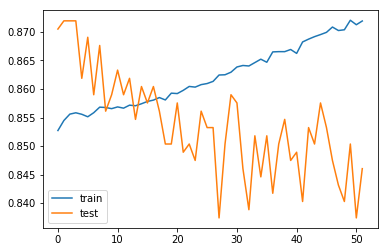

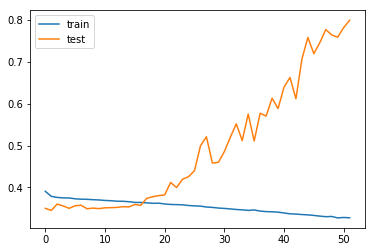

In [399]:
from matplotlib import pyplot
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

<class 'tensorflow.python.keras.engine.sequential.Sequential'>


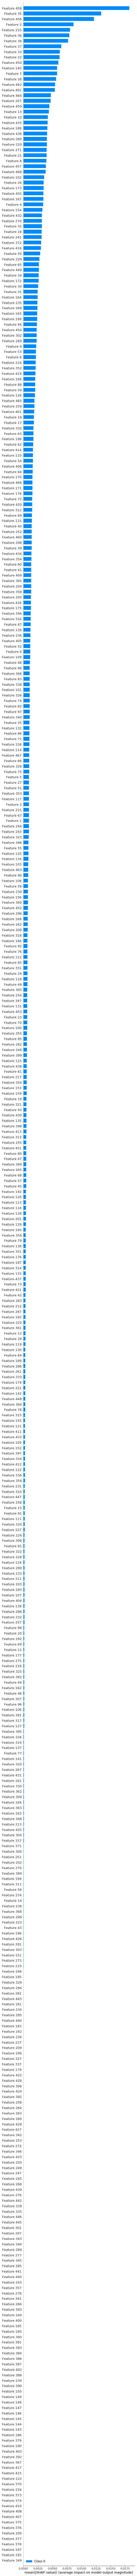

In [357]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(choosen_model, background)

shap_values = e.shap_values(x_test)

shap.summary_plot(shap_values, x_train,plot_size='auto',max_display=499)

In [358]:
#==========================================================================================
df01=df

In [359]:
import numpy as np
df02=df01
selected_feature=200
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(x_train, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
#a=feature_importance.head()
#aa=(a.iloc[:,0])

deep_clean_indix=[]
for row in feature_importance.index:
    deep_clean_indix.append(row)
    #print(row, end = " ")
deep_clean_indix=deep_clean_indix[selected_feature:]
deep_clean_name=[]
for i in deep_clean_indix:
    deep_clean_name.append(df01.columns[i+2])
    

for q in deep_clean_name:
    print(q)
    df02=df02.drop(columns=[q])
#aq
df02

betos_o1b_pmpm_ct
submcc_dig_othr_pmpm_ct
credit_hh_totalallcredit_collections
submcc_vco_care_pmpm_ct
credit_prcnt_agencyfirstmtg
submcc_res_inf_pmpm_ct
submcc_sns_abd_pmpm_ct
submcc_cir_othr_pmpm_ct
rx_gpi2_86_pmpm_ct
total_urgent_care_visit_ct_pmpm
credit_hh_autofinance
credit_bal_agencyfirstmtg_new
submcc_ner_epil_pmpm_ct
rx_gpi2_97_pmpm_ct
credit_bal_studentloan_60dpd
credit_bal_mtg_90to119dpd
credit_bal_agency1stmorg_collectio
rx_gpi2_21_pmpm_ct
credit_num_mtg_60to89dpd
credit_num_autofinance
credit_num_consumerfinance
credit_num_nonagn1stmorg_bankruptc
rx_gpi2_30_pmpm_ct
credit_num_nonagn1stmorg_collectio
pdc_hf
submcc_men_othr_pmpm_ct
credit_hh_autobank_new
credit_prcnt_autobank
submcc_inj_org_pmpm_ct
rx_gpi2_03_pmpm_ct
rx_gpi2_16_pmpm_ct
submcc_dia_eye_pmpm_ct
credit_num_totalallcredit_collections
total_ip_acute_admit_ct_pmpm
credit_hh_1stmtg_severederog
submcc_trm_brn_pmpm_ct
credit_bal_1stmtg_collections
submcc_bld_othr_pmpm_ct
rx_gpi2_41_pmpm_ct
submcc_cad_ashd_pmpm_ct
rx_g

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,CMS level 2 diagnosis,KBM,HEDIS,Health Program,Abnormal Lab Results,Binary indicator for a select group of categories,Revenue code Centers for Medicare and Medicaid Services categories,Major Clinical Category categories,generic product indicator for drugs (GPI),BETO
0,0002MOb79ST17bLYAe46eIc2,0,1,1,62,1,0,1,0,3.0,...,2.0,0.000000,0.000000,0.0,0.0,2.0,0.0,14.0,3.0,1.0
1,0004cMOS6bTLf34Y7AIca8f3,0,1,1,59,1,0,1,10,1.0,...,3.0,1.000000,3.000000,2.0,0.0,3.0,0.0,18.0,13.0,5.0
2,000536M9O3ST98LaYaeA29Ia,1,1,1,63,0,0,1,0,3.0,...,1.0,8.000000,6.213473,0.0,0.0,2.0,2.0,15.0,16.0,9.0
3,0009bMO9SfTLYe77A51I4ac3,0,1,2,75,0,0,1,6,3.0,...,0.0,45.210100,6.394174,2.0,2.0,1.0,0.0,9.0,12.0,4.0
4,000M7OeS66bTL8bY89Aa16Ie,0,1,2,51,1,0,1,0,3.0,...,2.0,77.000000,5.544834,0.0,4.0,4.0,3.0,11.0,12.0,5.0
5,000MOa9ScTdLa4d9f3YAI068,0,1,1,73,0,0,1,2,4.0,...,1.0,35.000000,6.668184,2.0,1.0,1.0,0.0,22.0,11.0,8.0
6,0013dMOS3TeL28YA12ea5ecI,0,1,1,57,0,0,1,6,1.0,...,2.0,3.000000,4.766955,0.0,1.0,1.0,0.0,9.0,7.0,4.0
7,001548d79bMeO7S283TLYAI0,0,1,1,83,0,0,1,0,4.0,...,2.0,19.000000,4.843878,0.0,1.0,2.0,2.0,16.0,11.0,5.0
8,0015M1Ob8S1bT1086LYAf9Ia,1,1,1,56,0,0,1,2,6.0,...,0.0,12.500000,5.901684,2.0,1.0,1.0,2.0,17.0,14.0,4.0
9,0015M23c489ObSb70TLYcbAI,0,2,2,69,0,0,1,4,2.0,...,3.0,6.000000,6.943104,0.0,2.0,3.0,0.0,12.0,7.0,7.0


In [299]:
#=========================================================================================

In [361]:
#initial work field list
parameter = []
trans_chan = []
full_list02=[]
#append value to each list
for i in range(len(df02['transportation_issues'])):
    #fetch eachrow
    idindex=df02['person_id_syn'][i]
    subset=df02.loc[df02['person_id_syn']==idindex]
    full_list02.append(((subset.values.tolist())[0][1:]))#55 is current best

In [362]:
test_portion=0.3
random.shuffle(full_list02)
parameter = []
trans_chan = []
for x in range(len(full_list02)):
    parameter.append(full_list02[x][1:])
    trans_chan.append(full_list02[x][0])
split=int(test_portion * len(full_list02))
parameter=np.asarray(parameter)
trans_chan=np.asarray(trans_chan)
test_sequences01 = parameter[0:split]
training_sequences01 = parameter[split:len(full_list02)]
test_labels01 = trans_chan[0:split]
training_labels01 = trans_chan[split:len(full_list02)]

In [363]:
min_max_scaler=0
min_max_scaler = preprocessing.MinMaxScaler()
x_train01 = min_max_scaler.fit_transform(training_sequences01)
x_test01 = min_max_scaler.fit_transform(test_sequences01)
y_train01 = np.array(training_labels01)
y_test01 = np.array(test_labels01)

Data with input dtype <U32 was converted to float64 by MinMaxScaler.
Data with input dtype <U32 was converted to float64 by MinMaxScaler.


200
48.701
Train on 48701 samples, validate on 20871 samples
Epoch 1/500
48701/48701 [==============================] - ETA: 14:35 - loss: 0.6458 - acc: 0.75 - ETA: 1:32 - loss: 0.5436 - acc: 0.8188 - ETA: 50s - loss: 0.4767 - acc: 0.847 - ETA: 39s - loss: 0.4650 - acc: 0.84 - ETA: 30s - loss: 0.4544 - acc: 0.84 - ETA: 25s - loss: 0.4580 - acc: 0.84 - ETA: 21s - loss: 0.4497 - acc: 0.84 - ETA: 19s - loss: 0.4448 - acc: 0.84 - ETA: 17s - loss: 0.4438 - acc: 0.84 - ETA: 15s - loss: 0.4386 - acc: 0.84 - ETA: 14s - loss: 0.4352 - acc: 0.84 - ETA: 13s - loss: 0.4300 - acc: 0.85 - ETA: 12s - loss: 0.4298 - acc: 0.85 - ETA: 12s - loss: 0.4268 - acc: 0.85 - ETA: 11s - loss: 0.4248 - acc: 0.85 - ETA: 10s - loss: 0.4198 - acc: 0.85 - ETA: 10s - loss: 0.4195 - acc: 0.85 - ETA: 10s - loss: 0.4174 - acc: 0.85 - ETA: 9s - loss: 0.4178 - acc: 0.8535 - ETA: 9s - loss: 0.4132 - acc: 0.855 - ETA: 9s - loss: 0.4135 - acc: 0.855 - ETA: 8s - loss: 0.4140 - acc: 0.854 - ETA: 8s - loss: 0.4119 - acc: 0.855 -

48701/48701 [==============================] - ETA: 9s - loss: 0.2545 - acc: 0.916 - ETA: 6s - loss: 0.3947 - acc: 0.845 - ETA: 6s - loss: 0.3615 - acc: 0.861 - ETA: 6s - loss: 0.3564 - acc: 0.864 - ETA: 5s - loss: 0.3541 - acc: 0.866 - ETA: 5s - loss: 0.3604 - acc: 0.862 - ETA: 5s - loss: 0.3593 - acc: 0.864 - ETA: 5s - loss: 0.3698 - acc: 0.859 - ETA: 5s - loss: 0.3716 - acc: 0.858 - ETA: 5s - loss: 0.3736 - acc: 0.857 - ETA: 5s - loss: 0.3752 - acc: 0.857 - ETA: 5s - loss: 0.3777 - acc: 0.855 - ETA: 5s - loss: 0.3800 - acc: 0.855 - ETA: 5s - loss: 0.3813 - acc: 0.853 - ETA: 5s - loss: 0.3814 - acc: 0.852 - ETA: 5s - loss: 0.3837 - acc: 0.851 - ETA: 5s - loss: 0.3836 - acc: 0.851 - ETA: 5s - loss: 0.3835 - acc: 0.852 - ETA: 5s - loss: 0.3827 - acc: 0.852 - ETA: 5s - loss: 0.3815 - acc: 0.852 - ETA: 5s - loss: 0.3829 - acc: 0.851 - ETA: 4s - loss: 0.3833 - acc: 0.851 - ETA: 4s - loss: 0.3851 - acc: 0.851 - ETA: 4s - loss: 0.3847 - acc: 0.851 - ETA: 4s - loss: 0.3879 - acc: 0.849 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.4327 - acc: 0.854 - ETA: 6s - loss: 0.3889 - acc: 0.856 - ETA: 5s - loss: 0.3585 - acc: 0.865 - ETA: 5s - loss: 0.3793 - acc: 0.853 - ETA: 5s - loss: 0.3836 - acc: 0.855 - ETA: 5s - loss: 0.3718 - acc: 0.861 - ETA: 5s - loss: 0.3739 - acc: 0.860 - ETA: 5s - loss: 0.3715 - acc: 0.861 - ETA: 5s - loss: 0.3725 - acc: 0.859 - ETA: 5s - loss: 0.3763 - acc: 0.856 - ETA: 5s - loss: 0.3789 - acc: 0.855 - ETA: 5s - loss: 0.3755 - acc: 0.857 - ETA: 5s - loss: 0.3747 - acc: 0.856 - ETA: 5s - loss: 0.3730 - acc: 0.857 - ETA: 5s - loss: 0.3736 - acc: 0.856 - ETA: 5s - loss: 0.3739 - acc: 0.856 - ETA: 5s - loss: 0.3712 - acc: 0.858 - ETA: 5s - loss: 0.3714 - acc: 0.858 - ETA: 4s - loss: 0.3742 - acc: 0.857 - ETA: 4s - loss: 0.3749 - acc: 0.857 - ETA: 4s - loss: 0.3740 - acc: 0.857 - ETA: 4s - loss: 0.3735 - acc: 0.858 - ETA: 4s - loss: 0.3740 - acc: 0.858 - ETA: 4s - loss: 0.3747 - acc: 0.858 - ETA: 4s - loss: 0.3739 - acc: 0.858 - ETA

48701/48701 [==============================] - ETA: 8s - loss: 0.3686 - acc: 0.895 - ETA: 5s - loss: 0.3887 - acc: 0.852 - ETA: 5s - loss: 0.3827 - acc: 0.859 - ETA: 5s - loss: 0.3831 - acc: 0.853 - ETA: 5s - loss: 0.3770 - acc: 0.855 - ETA: 4s - loss: 0.3770 - acc: 0.851 - ETA: 4s - loss: 0.3771 - acc: 0.848 - ETA: 4s - loss: 0.3832 - acc: 0.848 - ETA: 4s - loss: 0.3808 - acc: 0.850 - ETA: 4s - loss: 0.3863 - acc: 0.848 - ETA: 5s - loss: 0.3834 - acc: 0.850 - ETA: 5s - loss: 0.3849 - acc: 0.850 - ETA: 5s - loss: 0.3826 - acc: 0.852 - ETA: 5s - loss: 0.3798 - acc: 0.853 - ETA: 5s - loss: 0.3819 - acc: 0.851 - ETA: 5s - loss: 0.3782 - acc: 0.853 - ETA: 5s - loss: 0.3784 - acc: 0.853 - ETA: 4s - loss: 0.3749 - acc: 0.855 - ETA: 4s - loss: 0.3763 - acc: 0.856 - ETA: 4s - loss: 0.3765 - acc: 0.855 - ETA: 4s - loss: 0.3772 - acc: 0.855 - ETA: 4s - loss: 0.3747 - acc: 0.857 - ETA: 4s - loss: 0.3732 - acc: 0.857 - ETA: 4s - loss: 0.3741 - acc: 0.857 - ETA: 4s - loss: 0.3743 - acc: 0.857 - ETA

48701/48701 [==============================] - ETA: 8s - loss: 0.3766 - acc: 0.854 - ETA: 6s - loss: 0.3779 - acc: 0.850 - ETA: 5s - loss: 0.3772 - acc: 0.858 - ETA: 5s - loss: 0.3713 - acc: 0.862 - ETA: 5s - loss: 0.3755 - acc: 0.860 - ETA: 5s - loss: 0.3752 - acc: 0.860 - ETA: 5s - loss: 0.3697 - acc: 0.863 - ETA: 5s - loss: 0.3693 - acc: 0.861 - ETA: 5s - loss: 0.3736 - acc: 0.859 - ETA: 5s - loss: 0.3731 - acc: 0.857 - ETA: 5s - loss: 0.3647 - acc: 0.861 - ETA: 5s - loss: 0.3656 - acc: 0.862 - ETA: 5s - loss: 0.3633 - acc: 0.864 - ETA: 5s - loss: 0.3680 - acc: 0.861 - ETA: 5s - loss: 0.3665 - acc: 0.861 - ETA: 5s - loss: 0.3694 - acc: 0.859 - ETA: 5s - loss: 0.3678 - acc: 0.860 - ETA: 5s - loss: 0.3681 - acc: 0.860 - ETA: 5s - loss: 0.3681 - acc: 0.860 - ETA: 5s - loss: 0.3682 - acc: 0.860 - ETA: 4s - loss: 0.3666 - acc: 0.861 - ETA: 4s - loss: 0.3660 - acc: 0.861 - ETA: 4s - loss: 0.3644 - acc: 0.862 - ETA: 4s - loss: 0.3654 - acc: 0.861 - ETA: 4s - loss: 0.3662 - acc: 0.860 - ETA

48701/48701 [==============================] - ETA: 10s - loss: 0.3046 - acc: 0.89 - ETA: 6s - loss: 0.3792 - acc: 0.8562 - ETA: 5s - loss: 0.3589 - acc: 0.859 - ETA: 5s - loss: 0.3559 - acc: 0.860 - ETA: 5s - loss: 0.3581 - acc: 0.853 - ETA: 5s - loss: 0.3625 - acc: 0.851 - ETA: 5s - loss: 0.3619 - acc: 0.853 - ETA: 5s - loss: 0.3631 - acc: 0.852 - ETA: 5s - loss: 0.3613 - acc: 0.854 - ETA: 5s - loss: 0.3646 - acc: 0.853 - ETA: 5s - loss: 0.3693 - acc: 0.851 - ETA: 5s - loss: 0.3678 - acc: 0.853 - ETA: 5s - loss: 0.3645 - acc: 0.854 - ETA: 5s - loss: 0.3660 - acc: 0.854 - ETA: 5s - loss: 0.3644 - acc: 0.856 - ETA: 5s - loss: 0.3648 - acc: 0.856 - ETA: 5s - loss: 0.3632 - acc: 0.858 - ETA: 5s - loss: 0.3629 - acc: 0.858 - ETA: 4s - loss: 0.3617 - acc: 0.859 - ETA: 4s - loss: 0.3628 - acc: 0.858 - ETA: 4s - loss: 0.3640 - acc: 0.857 - ETA: 4s - loss: 0.3633 - acc: 0.857 - ETA: 4s - loss: 0.3626 - acc: 0.857 - ETA: 4s - loss: 0.3628 - acc: 0.857 - ETA: 4s - loss: 0.3621 - acc: 0.857 - ET

48701/48701 [==============================] - ETA: 10s - loss: 0.4111 - acc: 0.83 - ETA: 6s - loss: 0.3443 - acc: 0.8604 - ETA: 6s - loss: 0.3567 - acc: 0.854 - ETA: 5s - loss: 0.3605 - acc: 0.853 - ETA: 5s - loss: 0.3584 - acc: 0.855 - ETA: 5s - loss: 0.3602 - acc: 0.856 - ETA: 5s - loss: 0.3654 - acc: 0.854 - ETA: 5s - loss: 0.3723 - acc: 0.849 - ETA: 5s - loss: 0.3737 - acc: 0.850 - ETA: 5s - loss: 0.3766 - acc: 0.849 - ETA: 5s - loss: 0.3742 - acc: 0.849 - ETA: 5s - loss: 0.3766 - acc: 0.849 - ETA: 5s - loss: 0.3778 - acc: 0.850 - ETA: 5s - loss: 0.3786 - acc: 0.850 - ETA: 5s - loss: 0.3748 - acc: 0.852 - ETA: 5s - loss: 0.3763 - acc: 0.852 - ETA: 5s - loss: 0.3773 - acc: 0.851 - ETA: 5s - loss: 0.3779 - acc: 0.851 - ETA: 5s - loss: 0.3792 - acc: 0.850 - ETA: 5s - loss: 0.3781 - acc: 0.851 - ETA: 4s - loss: 0.3783 - acc: 0.851 - ETA: 4s - loss: 0.3797 - acc: 0.850 - ETA: 4s - loss: 0.3781 - acc: 0.851 - ETA: 4s - loss: 0.3803 - acc: 0.850 - ETA: 4s - loss: 0.3814 - acc: 0.849 - ET

48701/48701 [==============================] - ETA: 9s - loss: 0.2761 - acc: 0.854 - ETA: 6s - loss: 0.3120 - acc: 0.877 - ETA: 6s - loss: 0.3547 - acc: 0.861 - ETA: 6s - loss: 0.3564 - acc: 0.860 - ETA: 6s - loss: 0.3476 - acc: 0.865 - ETA: 5s - loss: 0.3488 - acc: 0.863 - ETA: 5s - loss: 0.3460 - acc: 0.866 - ETA: 5s - loss: 0.3497 - acc: 0.863 - ETA: 5s - loss: 0.3510 - acc: 0.862 - ETA: 5s - loss: 0.3576 - acc: 0.860 - ETA: 5s - loss: 0.3561 - acc: 0.860 - ETA: 5s - loss: 0.3555 - acc: 0.861 - ETA: 5s - loss: 0.3633 - acc: 0.858 - ETA: 5s - loss: 0.3639 - acc: 0.858 - ETA: 5s - loss: 0.3646 - acc: 0.858 - ETA: 5s - loss: 0.3653 - acc: 0.858 - ETA: 5s - loss: 0.3664 - acc: 0.857 - ETA: 5s - loss: 0.3686 - acc: 0.855 - ETA: 5s - loss: 0.3645 - acc: 0.857 - ETA: 4s - loss: 0.3638 - acc: 0.858 - ETA: 4s - loss: 0.3650 - acc: 0.858 - ETA: 4s - loss: 0.3643 - acc: 0.858 - ETA: 4s - loss: 0.3650 - acc: 0.858 - ETA: 4s - loss: 0.3663 - acc: 0.856 - ETA: 4s - loss: 0.3684 - acc: 0.856 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.3174 - acc: 0.854 - ETA: 6s - loss: 0.3508 - acc: 0.866 - ETA: 5s - loss: 0.3729 - acc: 0.857 - ETA: 5s - loss: 0.3796 - acc: 0.855 - ETA: 5s - loss: 0.3746 - acc: 0.859 - ETA: 5s - loss: 0.3799 - acc: 0.856 - ETA: 5s - loss: 0.3830 - acc: 0.854 - ETA: 5s - loss: 0.3756 - acc: 0.857 - ETA: 5s - loss: 0.3716 - acc: 0.857 - ETA: 5s - loss: 0.3665 - acc: 0.861 - ETA: 5s - loss: 0.3628 - acc: 0.862 - ETA: 5s - loss: 0.3663 - acc: 0.860 - ETA: 5s - loss: 0.3673 - acc: 0.859 - ETA: 5s - loss: 0.3629 - acc: 0.861 - ETA: 5s - loss: 0.3579 - acc: 0.863 - ETA: 5s - loss: 0.3582 - acc: 0.864 - ETA: 5s - loss: 0.3590 - acc: 0.863 - ETA: 5s - loss: 0.3587 - acc: 0.863 - ETA: 4s - loss: 0.3593 - acc: 0.862 - ETA: 4s - loss: 0.3616 - acc: 0.861 - ETA: 4s - loss: 0.3624 - acc: 0.861 - ETA: 4s - loss: 0.3642 - acc: 0.860 - ETA: 4s - loss: 0.3656 - acc: 0.859 - ETA: 4s - loss: 0.3648 - acc: 0.859 - ETA: 4s - loss: 0.3665 - acc: 0.858 - ETA

48701/48701 [==============================] - ETA: 30s - loss: 0.5044 - acc: 0.83 - ETA: 9s - loss: 0.3860 - acc: 0.8611 - ETA: 8s - loss: 0.4014 - acc: 0.848 - ETA: 7s - loss: 0.3861 - acc: 0.853 - ETA: 7s - loss: 0.3919 - acc: 0.852 - ETA: 6s - loss: 0.3954 - acc: 0.849 - ETA: 6s - loss: 0.4002 - acc: 0.843 - ETA: 6s - loss: 0.3911 - acc: 0.848 - ETA: 6s - loss: 0.3867 - acc: 0.850 - ETA: 6s - loss: 0.3841 - acc: 0.850 - ETA: 6s - loss: 0.3814 - acc: 0.850 - ETA: 6s - loss: 0.3800 - acc: 0.852 - ETA: 5s - loss: 0.3810 - acc: 0.851 - ETA: 5s - loss: 0.3837 - acc: 0.849 - ETA: 5s - loss: 0.3847 - acc: 0.849 - ETA: 5s - loss: 0.3834 - acc: 0.850 - ETA: 5s - loss: 0.3824 - acc: 0.850 - ETA: 5s - loss: 0.3811 - acc: 0.850 - ETA: 5s - loss: 0.3795 - acc: 0.850 - ETA: 5s - loss: 0.3763 - acc: 0.851 - ETA: 5s - loss: 0.3747 - acc: 0.852 - ETA: 5s - loss: 0.3735 - acc: 0.852 - ETA: 5s - loss: 0.3717 - acc: 0.853 - ETA: 5s - loss: 0.3713 - acc: 0.853 - ETA: 5s - loss: 0.3719 - acc: 0.853 - ET

48701/48701 [==============================] - ETA: 9s - loss: 0.4937 - acc: 0.812 - ETA: 6s - loss: 0.3695 - acc: 0.850 - ETA: 6s - loss: 0.3789 - acc: 0.852 - ETA: 5s - loss: 0.3674 - acc: 0.857 - ETA: 5s - loss: 0.3501 - acc: 0.864 - ETA: 5s - loss: 0.3546 - acc: 0.862 - ETA: 5s - loss: 0.3467 - acc: 0.865 - ETA: 5s - loss: 0.3503 - acc: 0.864 - ETA: 5s - loss: 0.3517 - acc: 0.864 - ETA: 5s - loss: 0.3592 - acc: 0.860 - ETA: 5s - loss: 0.3600 - acc: 0.860 - ETA: 5s - loss: 0.3636 - acc: 0.857 - ETA: 5s - loss: 0.3609 - acc: 0.858 - ETA: 5s - loss: 0.3619 - acc: 0.858 - ETA: 5s - loss: 0.3645 - acc: 0.857 - ETA: 5s - loss: 0.3655 - acc: 0.856 - ETA: 5s - loss: 0.3646 - acc: 0.856 - ETA: 5s - loss: 0.3652 - acc: 0.857 - ETA: 4s - loss: 0.3632 - acc: 0.858 - ETA: 4s - loss: 0.3657 - acc: 0.857 - ETA: 4s - loss: 0.3690 - acc: 0.856 - ETA: 4s - loss: 0.3693 - acc: 0.856 - ETA: 4s - loss: 0.3698 - acc: 0.856 - ETA: 4s - loss: 0.3671 - acc: 0.857 - ETA: 4s - loss: 0.3665 - acc: 0.857 - ETA

48701/48701 [==============================] - ETA: 10s - loss: 0.3861 - acc: 0.81 - ETA: 6s - loss: 0.3829 - acc: 0.8500 - ETA: 6s - loss: 0.3869 - acc: 0.843 - ETA: 5s - loss: 0.3992 - acc: 0.834 - ETA: 5s - loss: 0.3975 - acc: 0.835 - ETA: 5s - loss: 0.3954 - acc: 0.839 - ETA: 5s - loss: 0.3857 - acc: 0.843 - ETA: 5s - loss: 0.3834 - acc: 0.843 - ETA: 5s - loss: 0.3835 - acc: 0.844 - ETA: 5s - loss: 0.3850 - acc: 0.845 - ETA: 5s - loss: 0.3812 - acc: 0.846 - ETA: 5s - loss: 0.3786 - acc: 0.848 - ETA: 5s - loss: 0.3787 - acc: 0.849 - ETA: 5s - loss: 0.3742 - acc: 0.852 - ETA: 5s - loss: 0.3739 - acc: 0.852 - ETA: 5s - loss: 0.3737 - acc: 0.852 - ETA: 5s - loss: 0.3742 - acc: 0.851 - ETA: 5s - loss: 0.3747 - acc: 0.850 - ETA: 4s - loss: 0.3718 - acc: 0.852 - ETA: 4s - loss: 0.3690 - acc: 0.853 - ETA: 4s - loss: 0.3673 - acc: 0.854 - ETA: 4s - loss: 0.3679 - acc: 0.853 - ETA: 4s - loss: 0.3696 - acc: 0.852 - ETA: 4s - loss: 0.3676 - acc: 0.853 - ETA: 4s - loss: 0.3683 - acc: 0.854 - ET

48701/48701 [==============================] - ETA: 9s - loss: 0.4173 - acc: 0.791 - ETA: 6s - loss: 0.3782 - acc: 0.850 - ETA: 5s - loss: 0.3754 - acc: 0.856 - ETA: 5s - loss: 0.3753 - acc: 0.853 - ETA: 5s - loss: 0.3713 - acc: 0.857 - ETA: 5s - loss: 0.3648 - acc: 0.859 - ETA: 5s - loss: 0.3678 - acc: 0.856 - ETA: 5s - loss: 0.3692 - acc: 0.855 - ETA: 5s - loss: 0.3692 - acc: 0.853 - ETA: 5s - loss: 0.3778 - acc: 0.848 - ETA: 5s - loss: 0.3790 - acc: 0.848 - ETA: 5s - loss: 0.3789 - acc: 0.848 - ETA: 5s - loss: 0.3711 - acc: 0.853 - ETA: 5s - loss: 0.3737 - acc: 0.851 - ETA: 5s - loss: 0.3736 - acc: 0.851 - ETA: 5s - loss: 0.3726 - acc: 0.851 - ETA: 5s - loss: 0.3736 - acc: 0.851 - ETA: 5s - loss: 0.3769 - acc: 0.850 - ETA: 4s - loss: 0.3764 - acc: 0.850 - ETA: 4s - loss: 0.3758 - acc: 0.851 - ETA: 4s - loss: 0.3759 - acc: 0.850 - ETA: 4s - loss: 0.3747 - acc: 0.851 - ETA: 4s - loss: 0.3733 - acc: 0.852 - ETA: 4s - loss: 0.3740 - acc: 0.852 - ETA: 4s - loss: 0.3742 - acc: 0.852 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.3969 - acc: 0.833 - ETA: 5s - loss: 0.3344 - acc: 0.870 - ETA: 5s - loss: 0.3595 - acc: 0.860 - ETA: 5s - loss: 0.3545 - acc: 0.862 - ETA: 5s - loss: 0.3591 - acc: 0.858 - ETA: 5s - loss: 0.3583 - acc: 0.860 - ETA: 5s - loss: 0.3566 - acc: 0.861 - ETA: 5s - loss: 0.3576 - acc: 0.861 - ETA: 5s - loss: 0.3585 - acc: 0.861 - ETA: 5s - loss: 0.3564 - acc: 0.861 - ETA: 5s - loss: 0.3618 - acc: 0.858 - ETA: 5s - loss: 0.3612 - acc: 0.858 - ETA: 5s - loss: 0.3629 - acc: 0.857 - ETA: 5s - loss: 0.3656 - acc: 0.855 - ETA: 5s - loss: 0.3650 - acc: 0.856 - ETA: 5s - loss: 0.3647 - acc: 0.856 - ETA: 5s - loss: 0.3632 - acc: 0.857 - ETA: 5s - loss: 0.3627 - acc: 0.858 - ETA: 4s - loss: 0.3628 - acc: 0.857 - ETA: 4s - loss: 0.3620 - acc: 0.857 - ETA: 4s - loss: 0.3671 - acc: 0.855 - ETA: 4s - loss: 0.3663 - acc: 0.855 - ETA: 4s - loss: 0.3655 - acc: 0.856 - ETA: 4s - loss: 0.3662 - acc: 0.855 - ETA: 4s - loss: 0.3654 - acc: 0.856 - ETA

48701/48701 [==============================] - ETA: 10s - loss: 0.4686 - acc: 0.77 - ETA: 6s - loss: 0.3571 - acc: 0.8521 - ETA: 6s - loss: 0.3919 - acc: 0.836 - ETA: 6s - loss: 0.4011 - acc: 0.833 - ETA: 5s - loss: 0.4020 - acc: 0.833 - ETA: 5s - loss: 0.4000 - acc: 0.834 - ETA: 5s - loss: 0.3921 - acc: 0.839 - ETA: 5s - loss: 0.3900 - acc: 0.839 - ETA: 5s - loss: 0.3790 - acc: 0.844 - ETA: 5s - loss: 0.3786 - acc: 0.846 - ETA: 5s - loss: 0.3793 - acc: 0.846 - ETA: 5s - loss: 0.3811 - acc: 0.845 - ETA: 5s - loss: 0.3792 - acc: 0.846 - ETA: 5s - loss: 0.3791 - acc: 0.845 - ETA: 5s - loss: 0.3794 - acc: 0.846 - ETA: 5s - loss: 0.3783 - acc: 0.847 - ETA: 5s - loss: 0.3766 - acc: 0.848 - ETA: 5s - loss: 0.3784 - acc: 0.848 - ETA: 5s - loss: 0.3773 - acc: 0.849 - ETA: 5s - loss: 0.3779 - acc: 0.849 - ETA: 5s - loss: 0.3744 - acc: 0.851 - ETA: 4s - loss: 0.3726 - acc: 0.851 - ETA: 4s - loss: 0.3720 - acc: 0.852 - ETA: 4s - loss: 0.3722 - acc: 0.852 - ETA: 4s - loss: 0.3698 - acc: 0.854 - ET

48701/48701 [==============================] - ETA: 9s - loss: 0.2485 - acc: 0.916 - ETA: 6s - loss: 0.3823 - acc: 0.858 - ETA: 5s - loss: 0.3681 - acc: 0.864 - ETA: 5s - loss: 0.3740 - acc: 0.854 - ETA: 5s - loss: 0.3802 - acc: 0.853 - ETA: 5s - loss: 0.3724 - acc: 0.856 - ETA: 5s - loss: 0.3744 - acc: 0.852 - ETA: 5s - loss: 0.3682 - acc: 0.856 - ETA: 5s - loss: 0.3701 - acc: 0.853 - ETA: 5s - loss: 0.3739 - acc: 0.850 - ETA: 5s - loss: 0.3758 - acc: 0.850 - ETA: 5s - loss: 0.3743 - acc: 0.851 - ETA: 5s - loss: 0.3745 - acc: 0.850 - ETA: 5s - loss: 0.3725 - acc: 0.851 - ETA: 5s - loss: 0.3723 - acc: 0.851 - ETA: 5s - loss: 0.3716 - acc: 0.851 - ETA: 5s - loss: 0.3722 - acc: 0.851 - ETA: 5s - loss: 0.3729 - acc: 0.851 - ETA: 4s - loss: 0.3712 - acc: 0.852 - ETA: 4s - loss: 0.3721 - acc: 0.852 - ETA: 4s - loss: 0.3701 - acc: 0.853 - ETA: 4s - loss: 0.3700 - acc: 0.852 - ETA: 4s - loss: 0.3683 - acc: 0.853 - ETA: 4s - loss: 0.3678 - acc: 0.853 - ETA: 4s - loss: 0.3662 - acc: 0.854 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.4705 - acc: 0.791 - ETA: 6s - loss: 0.3786 - acc: 0.850 - ETA: 5s - loss: 0.3780 - acc: 0.845 - ETA: 5s - loss: 0.3811 - acc: 0.846 - ETA: 5s - loss: 0.3776 - acc: 0.847 - ETA: 5s - loss: 0.3741 - acc: 0.851 - ETA: 5s - loss: 0.3681 - acc: 0.853 - ETA: 5s - loss: 0.3638 - acc: 0.856 - ETA: 5s - loss: 0.3583 - acc: 0.859 - ETA: 5s - loss: 0.3577 - acc: 0.859 - ETA: 5s - loss: 0.3640 - acc: 0.855 - ETA: 5s - loss: 0.3649 - acc: 0.854 - ETA: 5s - loss: 0.3653 - acc: 0.854 - ETA: 5s - loss: 0.3686 - acc: 0.853 - ETA: 5s - loss: 0.3679 - acc: 0.854 - ETA: 5s - loss: 0.3679 - acc: 0.854 - ETA: 5s - loss: 0.3693 - acc: 0.853 - ETA: 5s - loss: 0.3666 - acc: 0.855 - ETA: 4s - loss: 0.3693 - acc: 0.853 - ETA: 4s - loss: 0.3691 - acc: 0.853 - ETA: 4s - loss: 0.3682 - acc: 0.854 - ETA: 4s - loss: 0.3701 - acc: 0.852 - ETA: 4s - loss: 0.3685 - acc: 0.853 - ETA: 4s - loss: 0.3683 - acc: 0.853 - ETA: 4s - loss: 0.3679 - acc: 0.854 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.4763 - acc: 0.812 - ETA: 6s - loss: 0.3658 - acc: 0.860 - ETA: 5s - loss: 0.3689 - acc: 0.857 - ETA: 5s - loss: 0.3717 - acc: 0.852 - ETA: 5s - loss: 0.3665 - acc: 0.852 - ETA: 5s - loss: 0.3673 - acc: 0.852 - ETA: 5s - loss: 0.3689 - acc: 0.850 - ETA: 5s - loss: 0.3725 - acc: 0.848 - ETA: 5s - loss: 0.3737 - acc: 0.848 - ETA: 5s - loss: 0.3705 - acc: 0.851 - ETA: 5s - loss: 0.3717 - acc: 0.851 - ETA: 5s - loss: 0.3702 - acc: 0.852 - ETA: 5s - loss: 0.3675 - acc: 0.851 - ETA: 5s - loss: 0.3663 - acc: 0.852 - ETA: 5s - loss: 0.3646 - acc: 0.854 - ETA: 5s - loss: 0.3612 - acc: 0.856 - ETA: 5s - loss: 0.3644 - acc: 0.856 - ETA: 5s - loss: 0.3644 - acc: 0.856 - ETA: 5s - loss: 0.3633 - acc: 0.856 - ETA: 4s - loss: 0.3632 - acc: 0.856 - ETA: 4s - loss: 0.3639 - acc: 0.856 - ETA: 4s - loss: 0.3661 - acc: 0.855 - ETA: 4s - loss: 0.3644 - acc: 0.856 - ETA: 4s - loss: 0.3671 - acc: 0.855 - ETA: 4s - loss: 0.3655 - acc: 0.856 - ETA

48701/48701 [==============================] - ETA: 10s - loss: 0.5258 - acc: 0.75 - ETA: 6s - loss: 0.3706 - acc: 0.8521 - ETA: 6s - loss: 0.3765 - acc: 0.843 - ETA: 5s - loss: 0.3657 - acc: 0.851 - ETA: 5s - loss: 0.3759 - acc: 0.848 - ETA: 5s - loss: 0.3707 - acc: 0.850 - ETA: 5s - loss: 0.3651 - acc: 0.853 - ETA: 5s - loss: 0.3672 - acc: 0.853 - ETA: 5s - loss: 0.3646 - acc: 0.855 - ETA: 5s - loss: 0.3638 - acc: 0.855 - ETA: 5s - loss: 0.3620 - acc: 0.856 - ETA: 5s - loss: 0.3643 - acc: 0.856 - ETA: 5s - loss: 0.3629 - acc: 0.855 - ETA: 5s - loss: 0.3654 - acc: 0.854 - ETA: 5s - loss: 0.3663 - acc: 0.853 - ETA: 5s - loss: 0.3680 - acc: 0.852 - ETA: 5s - loss: 0.3662 - acc: 0.853 - ETA: 5s - loss: 0.3663 - acc: 0.853 - ETA: 4s - loss: 0.3662 - acc: 0.853 - ETA: 4s - loss: 0.3656 - acc: 0.853 - ETA: 4s - loss: 0.3646 - acc: 0.854 - ETA: 4s - loss: 0.3663 - acc: 0.853 - ETA: 4s - loss: 0.3647 - acc: 0.854 - ETA: 4s - loss: 0.3636 - acc: 0.854 - ETA: 4s - loss: 0.3631 - acc: 0.854 - ET

48701/48701 [==============================] - ETA: 9s - loss: 0.4225 - acc: 0.833 - ETA: 6s - loss: 0.3529 - acc: 0.860 - ETA: 5s - loss: 0.3499 - acc: 0.860 - ETA: 5s - loss: 0.3521 - acc: 0.857 - ETA: 5s - loss: 0.3496 - acc: 0.862 - ETA: 5s - loss: 0.3619 - acc: 0.854 - ETA: 5s - loss: 0.3681 - acc: 0.852 - ETA: 5s - loss: 0.3620 - acc: 0.856 - ETA: 5s - loss: 0.3676 - acc: 0.854 - ETA: 5s - loss: 0.3638 - acc: 0.858 - ETA: 5s - loss: 0.3627 - acc: 0.857 - ETA: 5s - loss: 0.3658 - acc: 0.855 - ETA: 5s - loss: 0.3665 - acc: 0.855 - ETA: 5s - loss: 0.3657 - acc: 0.854 - ETA: 5s - loss: 0.3644 - acc: 0.855 - ETA: 5s - loss: 0.3668 - acc: 0.854 - ETA: 5s - loss: 0.3644 - acc: 0.856 - ETA: 5s - loss: 0.3633 - acc: 0.857 - ETA: 5s - loss: 0.3636 - acc: 0.857 - ETA: 5s - loss: 0.3634 - acc: 0.857 - ETA: 5s - loss: 0.3633 - acc: 0.857 - ETA: 5s - loss: 0.3618 - acc: 0.858 - ETA: 4s - loss: 0.3639 - acc: 0.856 - ETA: 4s - loss: 0.3636 - acc: 0.856 - ETA: 4s - loss: 0.3628 - acc: 0.856 - ETA

48701/48701 [==============================] - ETA: 11s - loss: 0.3854 - acc: 0.83 - ETA: 6s - loss: 0.3407 - acc: 0.8646 - ETA: 5s - loss: 0.3373 - acc: 0.861 - ETA: 5s - loss: 0.3493 - acc: 0.866 - ETA: 5s - loss: 0.3635 - acc: 0.860 - ETA: 5s - loss: 0.3752 - acc: 0.854 - ETA: 5s - loss: 0.3699 - acc: 0.858 - ETA: 5s - loss: 0.3743 - acc: 0.855 - ETA: 5s - loss: 0.3761 - acc: 0.853 - ETA: 5s - loss: 0.3774 - acc: 0.853 - ETA: 5s - loss: 0.3788 - acc: 0.851 - ETA: 5s - loss: 0.3779 - acc: 0.851 - ETA: 5s - loss: 0.3751 - acc: 0.852 - ETA: 5s - loss: 0.3774 - acc: 0.851 - ETA: 5s - loss: 0.3784 - acc: 0.850 - ETA: 5s - loss: 0.3761 - acc: 0.851 - ETA: 5s - loss: 0.3749 - acc: 0.852 - ETA: 5s - loss: 0.3791 - acc: 0.849 - ETA: 4s - loss: 0.3785 - acc: 0.848 - ETA: 4s - loss: 0.3753 - acc: 0.850 - ETA: 4s - loss: 0.3753 - acc: 0.850 - ETA: 4s - loss: 0.3749 - acc: 0.850 - ETA: 4s - loss: 0.3747 - acc: 0.851 - ETA: 4s - loss: 0.3745 - acc: 0.851 - ETA: 4s - loss: 0.3741 - acc: 0.851 - ET

48701/48701 [==============================] - ETA: 8s - loss: 0.2241 - acc: 0.916 - ETA: 6s - loss: 0.3470 - acc: 0.866 - ETA: 5s - loss: 0.3353 - acc: 0.871 - ETA: 5s - loss: 0.3353 - acc: 0.869 - ETA: 5s - loss: 0.3458 - acc: 0.864 - ETA: 5s - loss: 0.3501 - acc: 0.863 - ETA: 5s - loss: 0.3512 - acc: 0.864 - ETA: 5s - loss: 0.3476 - acc: 0.867 - ETA: 5s - loss: 0.3514 - acc: 0.865 - ETA: 5s - loss: 0.3541 - acc: 0.863 - ETA: 5s - loss: 0.3582 - acc: 0.859 - ETA: 5s - loss: 0.3552 - acc: 0.861 - ETA: 5s - loss: 0.3566 - acc: 0.862 - ETA: 5s - loss: 0.3610 - acc: 0.859 - ETA: 5s - loss: 0.3652 - acc: 0.857 - ETA: 5s - loss: 0.3635 - acc: 0.858 - ETA: 5s - loss: 0.3634 - acc: 0.858 - ETA: 5s - loss: 0.3670 - acc: 0.856 - ETA: 5s - loss: 0.3661 - acc: 0.856 - ETA: 5s - loss: 0.3682 - acc: 0.855 - ETA: 4s - loss: 0.3659 - acc: 0.857 - ETA: 4s - loss: 0.3633 - acc: 0.859 - ETA: 4s - loss: 0.3614 - acc: 0.859 - ETA: 4s - loss: 0.3613 - acc: 0.860 - ETA: 4s - loss: 0.3587 - acc: 0.861 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.2523 - acc: 0.937 - ETA: 6s - loss: 0.3398 - acc: 0.879 - ETA: 6s - loss: 0.3547 - acc: 0.869 - ETA: 5s - loss: 0.3626 - acc: 0.860 - ETA: 5s - loss: 0.3608 - acc: 0.858 - ETA: 5s - loss: 0.3652 - acc: 0.856 - ETA: 5s - loss: 0.3742 - acc: 0.850 - ETA: 5s - loss: 0.3767 - acc: 0.850 - ETA: 5s - loss: 0.3723 - acc: 0.852 - ETA: 5s - loss: 0.3711 - acc: 0.852 - ETA: 5s - loss: 0.3645 - acc: 0.854 - ETA: 5s - loss: 0.3603 - acc: 0.858 - ETA: 5s - loss: 0.3652 - acc: 0.856 - ETA: 5s - loss: 0.3673 - acc: 0.855 - ETA: 5s - loss: 0.3682 - acc: 0.854 - ETA: 5s - loss: 0.3699 - acc: 0.853 - ETA: 5s - loss: 0.3679 - acc: 0.854 - ETA: 5s - loss: 0.3653 - acc: 0.856 - ETA: 4s - loss: 0.3653 - acc: 0.856 - ETA: 4s - loss: 0.3644 - acc: 0.855 - ETA: 4s - loss: 0.3646 - acc: 0.855 - ETA: 4s - loss: 0.3641 - acc: 0.855 - ETA: 4s - loss: 0.3641 - acc: 0.855 - ETA: 4s - loss: 0.3638 - acc: 0.856 - ETA: 4s - loss: 0.3632 - acc: 0.856 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.2968 - acc: 0.916 - ETA: 6s - loss: 0.3738 - acc: 0.849 - ETA: 6s - loss: 0.3727 - acc: 0.846 - ETA: 6s - loss: 0.3649 - acc: 0.851 - ETA: 6s - loss: 0.3673 - acc: 0.851 - ETA: 6s - loss: 0.3682 - acc: 0.850 - ETA: 6s - loss: 0.3662 - acc: 0.850 - ETA: 5s - loss: 0.3731 - acc: 0.846 - ETA: 5s - loss: 0.3652 - acc: 0.852 - ETA: 5s - loss: 0.3626 - acc: 0.855 - ETA: 5s - loss: 0.3609 - acc: 0.857 - ETA: 5s - loss: 0.3599 - acc: 0.858 - ETA: 5s - loss: 0.3573 - acc: 0.858 - ETA: 5s - loss: 0.3576 - acc: 0.859 - ETA: 5s - loss: 0.3553 - acc: 0.861 - ETA: 5s - loss: 0.3513 - acc: 0.864 - ETA: 5s - loss: 0.3543 - acc: 0.862 - ETA: 5s - loss: 0.3497 - acc: 0.863 - ETA: 5s - loss: 0.3496 - acc: 0.863 - ETA: 5s - loss: 0.3501 - acc: 0.863 - ETA: 4s - loss: 0.3493 - acc: 0.863 - ETA: 4s - loss: 0.3483 - acc: 0.863 - ETA: 4s - loss: 0.3476 - acc: 0.863 - ETA: 4s - loss: 0.3460 - acc: 0.864 - ETA: 4s - loss: 0.3477 - acc: 0.863 - ETA

48701/48701 [==============================] - ETA: 8s - loss: 0.3776 - acc: 0.854 - ETA: 6s - loss: 0.3419 - acc: 0.870 - ETA: 6s - loss: 0.3572 - acc: 0.857 - ETA: 6s - loss: 0.3643 - acc: 0.851 - ETA: 6s - loss: 0.3695 - acc: 0.848 - ETA: 5s - loss: 0.3727 - acc: 0.846 - ETA: 5s - loss: 0.3687 - acc: 0.850 - ETA: 5s - loss: 0.3651 - acc: 0.851 - ETA: 5s - loss: 0.3620 - acc: 0.855 - ETA: 5s - loss: 0.3576 - acc: 0.858 - ETA: 5s - loss: 0.3610 - acc: 0.854 - ETA: 5s - loss: 0.3630 - acc: 0.854 - ETA: 5s - loss: 0.3637 - acc: 0.853 - ETA: 5s - loss: 0.3646 - acc: 0.853 - ETA: 5s - loss: 0.3620 - acc: 0.854 - ETA: 5s - loss: 0.3613 - acc: 0.855 - ETA: 5s - loss: 0.3590 - acc: 0.855 - ETA: 5s - loss: 0.3589 - acc: 0.856 - ETA: 5s - loss: 0.3564 - acc: 0.857 - ETA: 5s - loss: 0.3540 - acc: 0.858 - ETA: 5s - loss: 0.3542 - acc: 0.858 - ETA: 5s - loss: 0.3532 - acc: 0.859 - ETA: 5s - loss: 0.3539 - acc: 0.858 - ETA: 5s - loss: 0.3547 - acc: 0.858 - ETA: 5s - loss: 0.3553 - acc: 0.858 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.3039 - acc: 0.895 - ETA: 6s - loss: 0.3758 - acc: 0.845 - ETA: 6s - loss: 0.3487 - acc: 0.857 - ETA: 5s - loss: 0.3703 - acc: 0.843 - ETA: 5s - loss: 0.3646 - acc: 0.846 - ETA: 5s - loss: 0.3594 - acc: 0.850 - ETA: 5s - loss: 0.3569 - acc: 0.853 - ETA: 5s - loss: 0.3584 - acc: 0.853 - ETA: 5s - loss: 0.3504 - acc: 0.856 - ETA: 5s - loss: 0.3473 - acc: 0.858 - ETA: 5s - loss: 0.3525 - acc: 0.855 - ETA: 5s - loss: 0.3562 - acc: 0.854 - ETA: 5s - loss: 0.3575 - acc: 0.854 - ETA: 5s - loss: 0.3581 - acc: 0.854 - ETA: 5s - loss: 0.3593 - acc: 0.854 - ETA: 5s - loss: 0.3580 - acc: 0.854 - ETA: 5s - loss: 0.3550 - acc: 0.856 - ETA: 5s - loss: 0.3558 - acc: 0.856 - ETA: 5s - loss: 0.3582 - acc: 0.855 - ETA: 4s - loss: 0.3599 - acc: 0.854 - ETA: 4s - loss: 0.3608 - acc: 0.854 - ETA: 4s - loss: 0.3618 - acc: 0.853 - ETA: 4s - loss: 0.3623 - acc: 0.853 - ETA: 4s - loss: 0.3606 - acc: 0.855 - ETA: 4s - loss: 0.3602 - acc: 0.854 - ETA

48701/48701 [==============================] - ETA: 10s - loss: 0.2591 - acc: 0.93 - ETA: 6s - loss: 0.3660 - acc: 0.8562 - ETA: 6s - loss: 0.3352 - acc: 0.871 - ETA: 5s - loss: 0.3408 - acc: 0.869 - ETA: 5s - loss: 0.3481 - acc: 0.868 - ETA: 5s - loss: 0.3473 - acc: 0.867 - ETA: 5s - loss: 0.3459 - acc: 0.867 - ETA: 5s - loss: 0.3579 - acc: 0.859 - ETA: 5s - loss: 0.3575 - acc: 0.857 - ETA: 5s - loss: 0.3555 - acc: 0.857 - ETA: 5s - loss: 0.3550 - acc: 0.858 - ETA: 5s - loss: 0.3563 - acc: 0.857 - ETA: 5s - loss: 0.3533 - acc: 0.858 - ETA: 5s - loss: 0.3540 - acc: 0.859 - ETA: 5s - loss: 0.3546 - acc: 0.859 - ETA: 5s - loss: 0.3530 - acc: 0.859 - ETA: 5s - loss: 0.3514 - acc: 0.861 - ETA: 5s - loss: 0.3515 - acc: 0.861 - ETA: 5s - loss: 0.3502 - acc: 0.862 - ETA: 5s - loss: 0.3476 - acc: 0.863 - ETA: 4s - loss: 0.3501 - acc: 0.862 - ETA: 4s - loss: 0.3481 - acc: 0.863 - ETA: 4s - loss: 0.3463 - acc: 0.864 - ETA: 4s - loss: 0.3460 - acc: 0.864 - ETA: 4s - loss: 0.3453 - acc: 0.864 - ET

48701/48701 [==============================] - ETA: 10s - loss: 0.2528 - acc: 0.89 - ETA: 6s - loss: 0.2924 - acc: 0.8819 - ETA: 6s - loss: 0.3420 - acc: 0.860 - ETA: 6s - loss: 0.3399 - acc: 0.865 - ETA: 5s - loss: 0.3497 - acc: 0.859 - ETA: 5s - loss: 0.3524 - acc: 0.859 - ETA: 5s - loss: 0.3614 - acc: 0.854 - ETA: 5s - loss: 0.3588 - acc: 0.853 - ETA: 5s - loss: 0.3613 - acc: 0.851 - ETA: 5s - loss: 0.3589 - acc: 0.853 - ETA: 5s - loss: 0.3573 - acc: 0.855 - ETA: 5s - loss: 0.3513 - acc: 0.858 - ETA: 5s - loss: 0.3527 - acc: 0.858 - ETA: 5s - loss: 0.3547 - acc: 0.857 - ETA: 5s - loss: 0.3529 - acc: 0.858 - ETA: 5s - loss: 0.3541 - acc: 0.858 - ETA: 5s - loss: 0.3565 - acc: 0.857 - ETA: 5s - loss: 0.3569 - acc: 0.857 - ETA: 5s - loss: 0.3557 - acc: 0.858 - ETA: 5s - loss: 0.3554 - acc: 0.858 - ETA: 4s - loss: 0.3553 - acc: 0.858 - ETA: 4s - loss: 0.3547 - acc: 0.859 - ETA: 4s - loss: 0.3573 - acc: 0.857 - ETA: 4s - loss: 0.3574 - acc: 0.858 - ETA: 4s - loss: 0.3592 - acc: 0.857 - ET

48701/48701 [==============================] - ETA: 8s - loss: 0.4064 - acc: 0.791 - ETA: 6s - loss: 0.3541 - acc: 0.852 - ETA: 5s - loss: 0.3405 - acc: 0.859 - ETA: 5s - loss: 0.3490 - acc: 0.855 - ETA: 5s - loss: 0.3404 - acc: 0.859 - ETA: 5s - loss: 0.3573 - acc: 0.851 - ETA: 5s - loss: 0.3634 - acc: 0.850 - ETA: 5s - loss: 0.3536 - acc: 0.855 - ETA: 5s - loss: 0.3490 - acc: 0.858 - ETA: 5s - loss: 0.3501 - acc: 0.857 - ETA: 5s - loss: 0.3497 - acc: 0.859 - ETA: 5s - loss: 0.3487 - acc: 0.860 - ETA: 5s - loss: 0.3489 - acc: 0.859 - ETA: 5s - loss: 0.3510 - acc: 0.858 - ETA: 5s - loss: 0.3486 - acc: 0.859 - ETA: 5s - loss: 0.3516 - acc: 0.858 - ETA: 5s - loss: 0.3511 - acc: 0.858 - ETA: 5s - loss: 0.3528 - acc: 0.858 - ETA: 5s - loss: 0.3534 - acc: 0.857 - ETA: 4s - loss: 0.3564 - acc: 0.855 - ETA: 4s - loss: 0.3550 - acc: 0.856 - ETA: 4s - loss: 0.3549 - acc: 0.856 - ETA: 4s - loss: 0.3559 - acc: 0.856 - ETA: 4s - loss: 0.3550 - acc: 0.857 - ETA: 4s - loss: 0.3530 - acc: 0.857 - ETA

48701/48701 [==============================] - ETA: 9s - loss: 0.2880 - acc: 0.875 - ETA: 6s - loss: 0.3757 - acc: 0.835 - ETA: 5s - loss: 0.3596 - acc: 0.852 - ETA: 5s - loss: 0.3471 - acc: 0.855 - ETA: 5s - loss: 0.3539 - acc: 0.853 - ETA: 5s - loss: 0.3515 - acc: 0.854 - ETA: 5s - loss: 0.3505 - acc: 0.855 - ETA: 5s - loss: 0.3568 - acc: 0.852 - ETA: 5s - loss: 0.3619 - acc: 0.849 - ETA: 5s - loss: 0.3629 - acc: 0.849 - ETA: 5s - loss: 0.3633 - acc: 0.849 - ETA: 5s - loss: 0.3614 - acc: 0.850 - ETA: 5s - loss: 0.3568 - acc: 0.852 - ETA: 5s - loss: 0.3604 - acc: 0.850 - ETA: 5s - loss: 0.3583 - acc: 0.852 - ETA: 5s - loss: 0.3545 - acc: 0.854 - ETA: 5s - loss: 0.3579 - acc: 0.853 - ETA: 5s - loss: 0.3622 - acc: 0.850 - ETA: 4s - loss: 0.3646 - acc: 0.849 - ETA: 4s - loss: 0.3655 - acc: 0.849 - ETA: 4s - loss: 0.3662 - acc: 0.850 - ETA: 4s - loss: 0.3664 - acc: 0.850 - ETA: 4s - loss: 0.3658 - acc: 0.851 - ETA: 4s - loss: 0.3638 - acc: 0.852 - ETA: 4s - loss: 0.3600 - acc: 0.854 - ETA

48701/48701 [==============================] - ETA: 10s - loss: 0.4112 - acc: 0.79 - ETA: 6s - loss: 0.3467 - acc: 0.8521 - ETA: 5s - loss: 0.3356 - acc: 0.865 - ETA: 5s - loss: 0.3685 - acc: 0.843 - ETA: 5s - loss: 0.3636 - acc: 0.848 - ETA: 5s - loss: 0.3664 - acc: 0.847 - ETA: 5s - loss: 0.3556 - acc: 0.853 - ETA: 5s - loss: 0.3676 - acc: 0.845 - ETA: 5s - loss: 0.3617 - acc: 0.851 - ETA: 5s - loss: 0.3637 - acc: 0.850 - ETA: 5s - loss: 0.3602 - acc: 0.851 - ETA: 5s - loss: 0.3620 - acc: 0.852 - ETA: 5s - loss: 0.3598 - acc: 0.853 - ETA: 5s - loss: 0.3566 - acc: 0.855 - ETA: 5s - loss: 0.3580 - acc: 0.855 - ETA: 5s - loss: 0.3576 - acc: 0.857 - ETA: 5s - loss: 0.3546 - acc: 0.858 - ETA: 5s - loss: 0.3584 - acc: 0.856 - ETA: 4s - loss: 0.3578 - acc: 0.856 - ETA: 4s - loss: 0.3583 - acc: 0.856 - ETA: 4s - loss: 0.3569 - acc: 0.857 - ETA: 4s - loss: 0.3568 - acc: 0.857 - ETA: 4s - loss: 0.3549 - acc: 0.858 - ETA: 4s - loss: 0.3551 - acc: 0.858 - ETA: 4s - loss: 0.3537 - acc: 0.859 - ET

48701/48701 [==============================] - ETA: 9s - loss: 0.3901 - acc: 0.812 - ETA: 6s - loss: 0.3755 - acc: 0.839 - ETA: 6s - loss: 0.3619 - acc: 0.855 - ETA: 6s - loss: 0.3628 - acc: 0.856 - ETA: 6s - loss: 0.3666 - acc: 0.851 - ETA: 6s - loss: 0.3661 - acc: 0.851 - ETA: 6s - loss: 0.3639 - acc: 0.855 - ETA: 6s - loss: 0.3599 - acc: 0.855 - ETA: 6s - loss: 0.3614 - acc: 0.854 - ETA: 5s - loss: 0.3565 - acc: 0.857 - ETA: 5s - loss: 0.3547 - acc: 0.858 - ETA: 5s - loss: 0.3585 - acc: 0.857 - ETA: 5s - loss: 0.3585 - acc: 0.857 - ETA: 5s - loss: 0.3563 - acc: 0.856 - ETA: 5s - loss: 0.3547 - acc: 0.857 - ETA: 5s - loss: 0.3570 - acc: 0.856 - ETA: 5s - loss: 0.3547 - acc: 0.858 - ETA: 5s - loss: 0.3558 - acc: 0.856 - ETA: 5s - loss: 0.3552 - acc: 0.858 - ETA: 5s - loss: 0.3571 - acc: 0.856 - ETA: 5s - loss: 0.3543 - acc: 0.857 - ETA: 5s - loss: 0.3534 - acc: 0.858 - ETA: 5s - loss: 0.3545 - acc: 0.858 - ETA: 5s - loss: 0.3530 - acc: 0.858 - ETA: 5s - loss: 0.3512 - acc: 0.859 - ETA

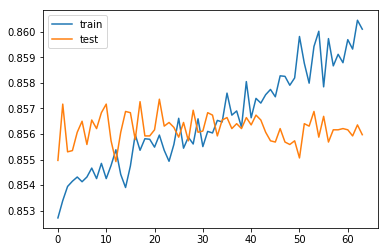

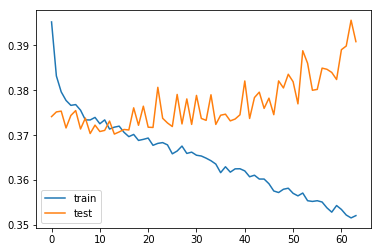

In [396]:
i=1000
o=0.0001
p=0.5
q=0.4
w=0.2
e=300
r=150
t=50
input_dim=len(test_sequences01[1])
print(input_dim)
batch_size=len(training_sequences01)/i
print(batch_size)
model01 = tf.keras.Sequential([
    #Dense(471, kernel_initializer = 'uniform',activation='relu',input_dim=input_dim),
   # Dropout(0.3)
    Dense(e,  kernel_initializer = 'random_normal',activation='relu',input_dim=input_dim),
    Dropout(p),
    Dense(r, activation='relu',kernel_initializer = 'random_normal'),
    Dropout(q),
    Dense(t, activation='relu'),
    Dropout(w),
    #Dense(50, activation='relu'),
    #Dropout(0.1),
    #Dense(5, activation='relu'),
    #Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model01.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model01.summary()
num_epochs =500
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=o)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
mc = ModelCheckpoint('temp01.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)
history01 = model01.fit(x_train01, y_train01, epochs=num_epochs, callbacks=[es, mc], validation_data=(x_test01, y_test01),batch_size=int(batch_size),verbose=1)
#type(history01)
print(i,o,p,q,w,e,r,t)
acc_plot=pyplot.plot(history01.history['acc'], label='train')
acc_plot=pyplot.plot(history01.history['val_acc'], label='test')
acc_plot=pyplot.legend()
acc_plot=pyplot.show()

loss_plot=pyplot.plot(history01.history['loss'], label='train')
loss_plot=pyplot.plot(history01.history['val_loss'], label='test')
loss_plot=pyplot.legend()
loss_plot=pyplot.show()

#do a base line model


In [368]:
choosen_model01=tf.keras.models.load_model('temp01.h5')
type(choosen_model01)

tensorflow.python.keras.engine.sequential.Sequential

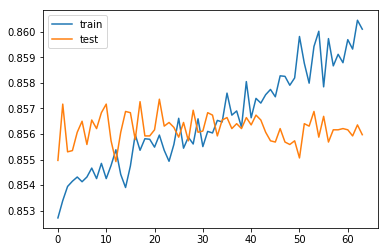

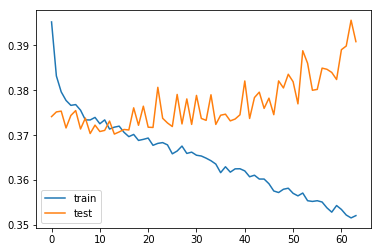

In [397]:
pyplot.plot(history01.history['acc'], label='train')
pyplot.plot(history01.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history01.history['loss'], label='train')
pyplot.plot(history01.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [369]:
# select a set of background examples to take an expectation over
background = x_train01[np.random.choice(x_train01.shape[0], 100, replace=False)]

e = shap.DeepExplainer(choosen_model01
                       , background)

shap_values = e.shap_values(x_train01)


KeyboardInterrupt: 

In [ ]:
shap.summary_plot(shap_values, x_train01,max_display=20)

In [ ]:
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(x_train01, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
a=feature_importance.head()
print(len(feature_importance))

all_index=[]
for row in feature_importance.index:
    all_index.append(row)
    
top20_index=all_index[0:20]
top20_name=[]
for i in top20_index:
    top20_name.append(df02.columns[i+2])
all_name=[]
for i in all_index:
    all_name.append(df02.columns[i+2])
print(top20_name,all_name)

In [ ]:
df01

In [228]:
#========================================================================================

In [229]:
data_pred=pd.read_csv(r'C:\Users\mao28\Desktop\fall2020BU\casecomp\2020_Competition_Holdout .csv',header=0)
data_pred=data_pred.replace('F', 1).replace('M',2).replace('EM',1).replace('LV',2).replace('ENG',1)\
.replace('E',2).replace('SPA',3).replace('H1',1).replace('H2',2).replace('H3',2)\
.replace('H4',4).replace('H5',5).replace('H6',6).replace('H7',7).replace('H8',8)\
.replace('C1',9).replace('C2',10).replace('C3',11).replace('C4',12).replace('C5',13)\
.replace('C6',14).replace('C7',15).replace('UNK',0).replace('nan',None).replace('A',1)\
.replace('B',2).replace('L',3).replace('J',4).replace('U',5).replace('D',6)\
.replace('K',7).replace('G',8).replace('C',9).replace('H',10).replace('F',11)\
.replace('I',12).replace('E',13).replace('Y',1).replace('P',15).replace('R',16)\
.replace('T',17).replace('N',0).replace('NA',None).replace('1-Metro',20).replace('2-Metro',21)\
.replace('6-Nonmetro',22).replace('3-Metro',23).replace('4-Nonmetro',24).replace('7-Nonmetro',25).replace('8-Nonmetro',26)\
.replace('5-Nonmetro',27).replace('9-Nonmetro',28).replace('other',29).replace('FL',30).replace('TN',31)\
.replace('LA',33).replace('NV',34).replace('IL',35).replace('NC',36).replace('VA',37)\
.replace('KY',38).replace('AZ',39).replace('IN',40).replace('GA',41).replace('SC',42)\
.replace('CO',43).replace('TX',44).replace('MT',45).replace('MS',46).replace('OH',47)\
.replace('AL',48).replace('MO',49).replace('CA',50).replace('MN',51).replace('WA',52)\
.replace('IA',53).replace('WV',54).replace('PR',55).replace('WI',56).replace('AR',57).replace('NM',58).replace('CN',59).replace('CF',60)\
.replace('CP',61).replace('SE',62).replace('*',None).drop('hedis_ami',axis=1).replace('OK',1).replace('SD',58)



Columns (79) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
data_pred=pd.read_csv(r'C:\Users\mao28\Desktop\fall2020BU\casecomp\pred.csv',header=0)
data_pred=data_pred.replace('F', 1).replace('M',2).replace('EM',1).replace('LV',2).replace('ENG',1)\
.replace('E',2).replace('SPA',3).replace('H1',1).replace('H2',2).replace('H3',2)\
.replace('H4',4).replace('H5',5).replace('H6',6).replace('H7',7).replace('H8',8)\
.replace('C1',9).replace('C2',10).replace('C3',11).replace('C4',12).replace('C5',13)\
.replace('C6',14).replace('C7',15).replace('UNK',0).replace('nan',None).replace('A',1)\
.replace('B',2).replace('L',3).replace('J',4).replace('U',5).replace('D',6)\
.replace('K',7).replace('G',8).replace('C',9).replace('H',10).replace('F',11)\
.replace('I',12).replace('E',13).replace('Y',1).replace('P',15).replace('R',16)\
.replace('T',17).replace('N',0).replace('NA',None).replace('1-Metro',20).replace('2-Metro',21)\
.replace('6-Nonmetro',22).replace('3-Metro',23).replace('4-Nonmetro',24).replace('7-Nonmetro',25).replace('8-Nonmetro',26)\
.replace('5-Nonmetro',27).replace('9-Nonmetro',28).replace('other',29).replace('FL',30).replace('TN',31)\
.replace('LA',33).replace('NV',34).replace('IL',35).replace('NC',36).replace('VA',37)\
.replace('KY',38).replace('AZ',39).replace('IN',40).replace('GA',41).replace('SC',42)\
.replace('CO',43).replace('TX',44).replace('MT',45).replace('MS',46).replace('OH',47)\
.replace('AL',48).replace('MO',49).replace('CA',50).replace('MN',51).replace('WA',52)\
.replace('IA',53).replace('WV',54).replace('PR',55).replace('WI',56).replace('AR',57).replace('NM',58).replace('CN',59).replace('CF',60)\
.replace('CP',61).replace('SE',62).replace('*',None).drop('hedis_ami',axis=1).replace('OK',1).replace('SD',58)



In [370]:
data_pred

,person_id_syn,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,...,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind,behavorial Health index
0,0002MOb79ST17bLYAe46eIc2,1,1,62,1,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0.0
1,0004cMOS6bTLf34Y7AIca8f3,1,1,59,1,0,1,10,1,2,...,0,0,0,1,0,0,0,0,1,0.0
2,000536M9O3ST98LaYaeA29Ia,1,1,63,0,0,1,0,3,0,...,0,0,0,0,0,0,0,0,1,0.0
3,0009bMO9SfTLYe77A51I4ac3,1,2,75,0,0,1,6,3,0,...,0,0,0,1,0,0,0,0,1,0.0
4,000M7OeS66bTL8bY89Aa16Ie,1,2,51,1,0,1,0,3,1,...,0,0,0,0,0,0,0,0,1,0.0
5,000MOa9ScTdLa4d9f3YAI068,1,1,73,0,0,1,2,4,1,...,0,0,0,1,0,0,0,0,1,0.0
6,0013dMOS3TeL28YA12ea5ecI,1,1,57,0,0,1,6,1,0,...,0,0,0,0,0,0,0,0,1,0.0
7,001548d79bMeO7S283TLYAI0,1,1,83,0,0,1,0,4,0,...,0,0,0,1,0,0,0,0,1,0.0
8,0015M1Ob8S1bT1086LYAf9Ia,1,1,56,0,0,1,2,6,3,...,0,0,0,0,0,0,0,0,1,0.0
9,0015M23c489ObSb70TLYcbAI,2,2,69,0,0,1,4,2,0,...,0,0,0,0,0,0,0,0,1,0.0


In [371]:
data_pred=data_pred.interpolate(method='pchip')
df_pred=data_pred

In [372]:
h= np.zeros(shape=(len(df_pred),1))
for i in range(len(list_name)):
    sumvar=list_name[i]
    #print(sumvar)
    sumvar_value=list_value[i]
    df_pred[sumvar] = pd.DataFrame(h,columns=[sumvar])
    for q in sumvar_value:
        #print(q)
        df_pred[sumvar]=df_pred[sumvar]+df_pred[q]
        df_pred=df_pred.drop(columns=[q])
print('done')

done


In [373]:
#df=df.fillna(0)
df_pred=df_pred.fillna(0)

df_pred01=df_pred
#print(df_pred01,'done')  

In [374]:
parameter = []
trans_chan = []
full_list=[]
id_list=[]
#append value to each list
for i in range(len(df_pred01['person_id_syn'])):
    #fetch eachrow
    idindex=df_pred01['person_id_syn'][i]
    subset=df_pred01.loc[df_pred01['person_id_syn']==idindex]
    id_list.append(idindex)
    full_list.append(((subset.values.tolist())[0])[1:])
predict_param=np.array(full_list)
predict_param_intermedia=predict_param


In [375]:
import numpy as np

for q in deep_clean_name:
    #print(q)
    df_pred01=df_pred01.drop(columns=[q])
#aq
df_pred01

,person_id_syn,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,...,CMS level 2 diagnosis,KBM,HEDIS,Health Program,Abnormal Lab Results,Binary indicator for a select group of categories,Revenue code Centers for Medicare and Medicaid Services categories,Major Clinical Category categories,generic product indicator for drugs (GPI),BETO
0,0002MOb79ST17bLYAe46eIc2,1,1,62,1,0,1,0,3,1,...,2.0,0.000000,0.000000,0.0,0.0,2.0,0.0,14.0,3.0,1.0
1,0004cMOS6bTLf34Y7AIca8f3,1,1,59,1,0,1,10,1,2,...,3.0,1.000000,3.000000,2.0,0.0,3.0,0.0,18.0,13.0,5.0
2,000536M9O3ST98LaYaeA29Ia,1,1,63,0,0,1,0,3,0,...,1.0,8.000000,6.213473,0.0,0.0,2.0,2.0,15.0,16.0,9.0
3,0009bMO9SfTLYe77A51I4ac3,1,2,75,0,0,1,6,3,0,...,0.0,45.210100,6.394174,2.0,2.0,1.0,0.0,9.0,12.0,4.0
4,000M7OeS66bTL8bY89Aa16Ie,1,2,51,1,0,1,0,3,1,...,2.0,77.000000,5.544834,0.0,4.0,4.0,3.0,11.0,12.0,5.0
5,000MOa9ScTdLa4d9f3YAI068,1,1,73,0,0,1,2,4,1,...,1.0,35.000000,6.668184,2.0,1.0,1.0,0.0,22.0,11.0,8.0
6,0013dMOS3TeL28YA12ea5ecI,1,1,57,0,0,1,6,1,0,...,2.0,3.000000,4.766955,0.0,1.0,1.0,0.0,9.0,7.0,4.0
7,001548d79bMeO7S283TLYAI0,1,1,83,0,0,1,0,4,0,...,2.0,19.000000,4.843878,0.0,1.0,2.0,2.0,16.0,11.0,5.0
8,0015M1Ob8S1bT1086LYAf9Ia,1,1,56,0,0,1,2,6,3,...,0.0,12.500000,5.901684,2.0,1.0,1.0,2.0,17.0,14.0,4.0
9,0015M23c489ObSb70TLYcbAI,2,2,69,0,0,1,4,2,0,...,3.0,6.000000,6.943104,0.0,2.0,3.0,0.0,12.0,7.0,7.0


In [376]:
parameter = []
trans_chan = []
full_list=[]
id_list=[]
#append value to each list
for i in range(len(df_pred01['person_id_syn'])):
    #fetch eachrow
    idindex=df_pred01['person_id_syn'][i]
    subset=df_pred01.loc[df_pred01['person_id_syn']==idindex]
    id_list.append(idindex)
    full_list.append(((subset.values.tolist())[0])[1:])
predict_param=np.array(full_list)

In [377]:
min_max_scaler = preprocessing.MinMaxScaler()
predict_param_norm = min_max_scaler.fit_transform(predict_param)
predict_param_intermedia = min_max_scaler.fit_transform(predict_param_intermedia)

Data with input dtype <U32 was converted to float64 by MinMaxScaler.
Data with input dtype <U32 was converted to float64 by MinMaxScaler.


In [400]:
#model
history_intermedia=model.predict(predict_param_intermedia)
#model01
history = model01.predict(predict_param_norm)
print(history_intermedia,history)

[[5.9408575e-02]
 [1.7108449e-01]
 [4.2000315e-01]
 ...
 [8.1624061e-02]
 [7.7463210e-02]
 [3.9282441e-04]] [[0.06798935]
 [0.300338  ]
 [0.4491553 ]
 ...
 [0.10011807]
 [0.10438344]
 [0.00254038]]


In [401]:
id_list=np.array(id_list)
id_list=np.reshape(id_list,(len(history_intermedia), 1))
final_output = np.stack((id_list, history_intermedia), axis=1)
final_output=np.reshape(final_output,(len(history_intermedia), 2))
df_final_output_inter = pd.DataFrame (final_output)

#===================================================
id_list=np.array(id_list)
id_list=np.reshape(id_list,(len(history), 1))
final_output = np.stack((id_list, history), axis=1)
final_output=np.reshape(final_output,(len(history), 2))
df_final_output = pd.DataFrame (final_output)
#===================================================


In [402]:
df_final_output_inter.to_excel (r'C:\Users\mao28\Desktop\fall2020BU\casecomp\test\final_output23pred_inter.xlsx', index = False, header=True) 
df_final_output.to_excel (r'C:\Users\mao28\Desktop\fall2020BU\casecomp\test\final_output23pred_final.xlsx', index = False, header=True) 

In [ ]:
#df_final_output.to_excel (r'C:\Users\mao28\Desktop\fall2020BU\casecomp\test\final_output10.xlsx', index = False, header=True) 

In [ ]:
#df_final_output.to_excel (r'C:\Users\mao28\Desktop\fall2020BU\casecomp\test\final_output11pred.xlsx', index = False, header=True) 

150
97.402
500 0.0001 0.3 0.2 0.1 471 200 50


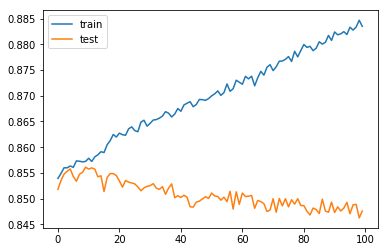

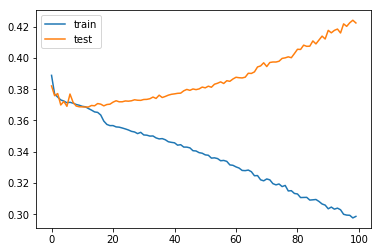

500 0.0001 0.3 0.2 0.1 471 200 50
150
97.402
500 0.0001 0.3 0.2 0.1 471 200 100


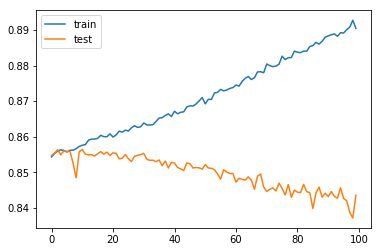

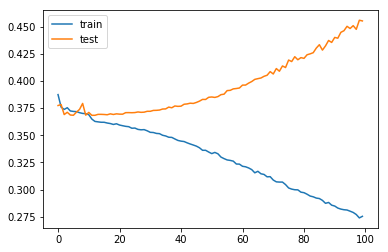

500 0.0001 0.3 0.2 0.1 471 200 100
150
97.402
500 0.0001 0.3 0.2 0.1 471 400 50


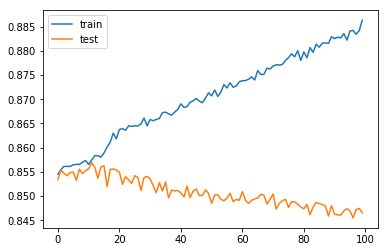

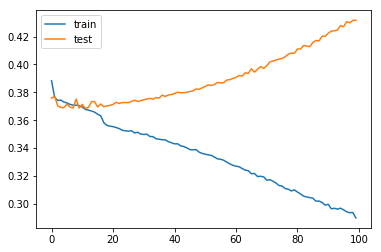

500 0.0001 0.3 0.2 0.1 471 400 50
150
97.402


KeyboardInterrupt: 

In [92]:
#hyperparameter tuning
batch_size_divider=[500,1000]
min_learn_rate=[0.0001,0.0003,0.0005]
drop_out_01=[0.3,0.5]
drop_out_02=[0.2,0.4]
drop_out_03=[0.1,0.2]
nodes_01=[471,800]
nodes_02=[200,400]
nodes_03=[50,100]
for i in (batch_size_divider):
    for o in (min_learn_rate):
        for p in(drop_out_01):
            for q in(drop_out_02):
                for w in (drop_out_03):
                    for e in (nodes_01):
                        for r in (nodes_02):
                            for t in (nodes_03):
                                final_train(i,o,p,q,w,e,r,t)

150
48.701
1000 0.0001 0.5 0.4 0.2 300 150 50


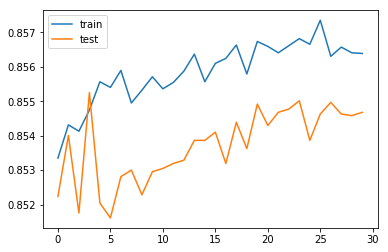

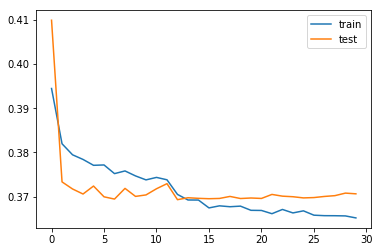

1000 0.0001 0.5 0.4 0.2 300 150 50


In [96]:
batch_size_divider=[1000]
min_learn_rate=[0.0001]
drop_out_01=[0.5]
drop_out_02=[0.4]
drop_out_03=[0.2]
nodes_01=[300]
nodes_02=[150]
nodes_03=[50]
for i in (batch_size_divider):
    for o in (min_learn_rate):
        for p in(drop_out_01):
            for q in(drop_out_02):
                for w in (drop_out_03):
                    for e in (nodes_01):
                        for r in (nodes_02):
                            for t in (nodes_03):
                                final_train(i,o,p,q,w,e,r,t)